In [1]:
import os
import shutil
#import pickle
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as ex
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
path = "Desktop/Advance House Price Prediction"
data_fetch_path = "Desktop/House Price prediction/Dataset/train.csv"
data_test_path = "Desktop/House Price prediction/Dataset/test.csv"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-41335eaa87a9>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
try:
    if(os.path.isdir(path)):
        shutil.rmtree(path)
    os.mkdir(path)
    df = pd.read_csv(data_fetch_path)
    test_df = pd.read_csv(data_test_path)
    os.mkdir("Desktop/Advance House Price Prediction/Dataset")
    df.to_csv("Desktop/Advance House Price Prediction/Dataset/train.csv")
    test_df.to_csv("Desktop/Advance House Price Prediction/Dataset/test.csv")
except Exception as e:
    print(e)

In [5]:
try:
    print("  "*20+"Meta Data")
    print("=="*50)
    print("Information related to the dataset")
    print("=="*50)
    print(df.info())
    print("=="*50)
    print("Insights of the continuous features are")
    print("=="*50)
    print(df.describe())
    print("=="*50)
    print("Insights of the categorical features are")
    print("=="*50)
    print(df.describe(include="O"))
    print("=="*50)
    print("Adding Details to meta data file")
    file = open(path + "/meta_data.txt","w")
    file.write("  "*20 + " Meta Data ")
    file.write("\n"+"=="*50)
    file.write("\nInformation related to the dataset")
    file.write("\n"+"=="*50+"\n")
    df.info(buf=file)
    file.write("\n"+"=="*50)
    file.write("\nInsights of the continuous features are")
    file.write("\n"+"=="*50+"\n")
    file.write(str(df.describe()))
    file.write("\n"+"=="*50)
    file.write("\nInsights of the categorical features are")
    file.write("\n"+"=="*50+"\n")
    file.write(str(df.describe(include = "O")))
    file.write("\n"+"=="*50+"\n")
    file.close()
    print("\nDetails Added Successfully !!")
    print("=="*50)
except Exception as e:
    print(e)

                                        Meta Data
Information related to the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle 

In [6]:
try:
    print("=="*50)
    print("Features having Missing values")
    print("=="*50)
    print(df[df.dtypes.index[df.isnull().sum() !=0]].isnull().sum())
    print("=="*50)
    print("Missing values are processed")
    df.drop(df.dtypes.index[df.isnull().sum() > 1000], axis = 1, inplace=True)
    df["FireplaceQu"].fillna(value=df["FireplaceQu"].describe()["top"],inplace=True)
    df["LotFrontage"].fillna(value=df["LotFrontage"].mean(), inplace=True)
    df.dropna(inplace=True)
    print("=="*50)
    print("Adding Missing values details in meta data file")
    file = open(path+"/meta_data.txt","a")
    file.write("Features having Missing values")
    file.write("\n"+"=="*50)
    file.write("\n"+str(df[df.dtypes.index[df.isnull().sum() !=0]].isnull().sum()))
    file.write("\n"+"=="*50)
    file.close()
    print("\nDetails are added successfully")
    print("=="*50)
except Exception as e:
    print(e)

Features having Missing values
LotFrontage     259 
Alley           1369
MasVnrType      8   
MasVnrArea      8   
BsmtQual        37  
BsmtCond        37  
BsmtExposure    38  
BsmtFinType1    37  
BsmtFinType2    38  
Electrical      1   
FireplaceQu     690 
GarageType      81  
GarageYrBlt     81  
GarageFinish    81  
GarageQual      81  
GarageCond      81  
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Missing values are processed
==
Adding Missing values details in meta data file

Details are added successfully


Scatter Plots Visualization


<ipython-input-6-55b54fb50251>:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-6-55b54fb50251>:31: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 2400x5600 with 0 Axes>

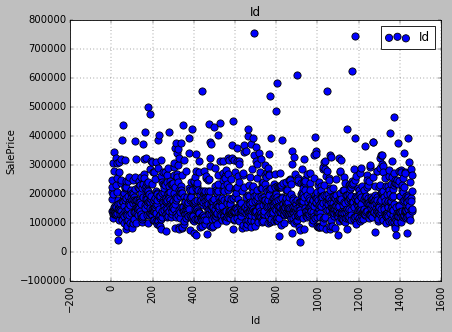

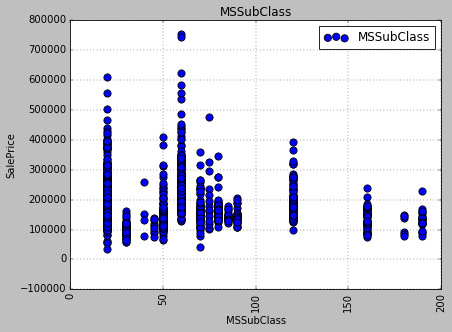

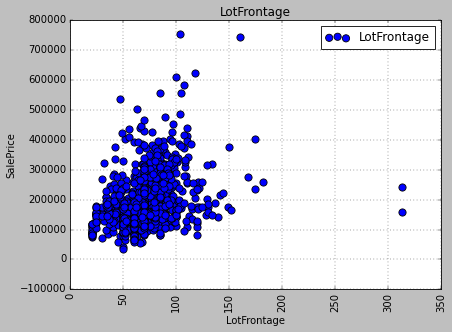

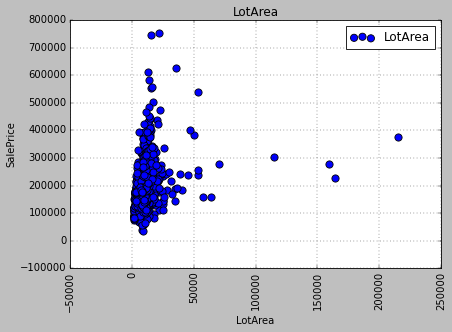

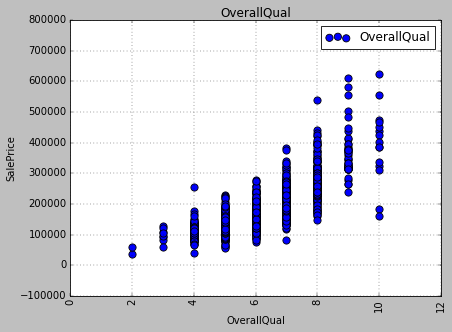

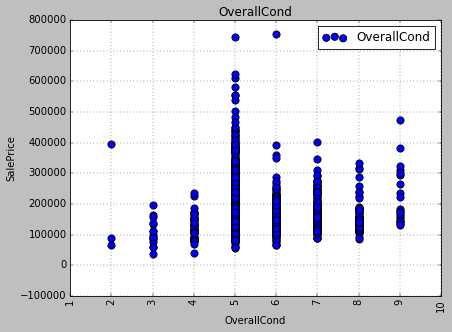

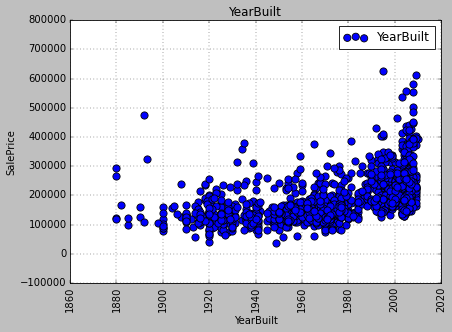

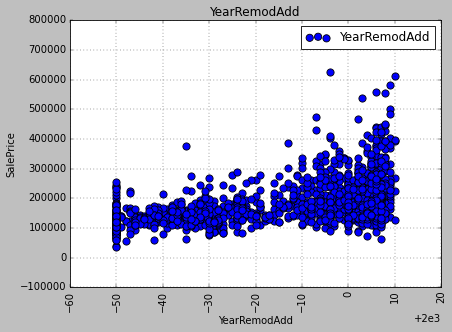

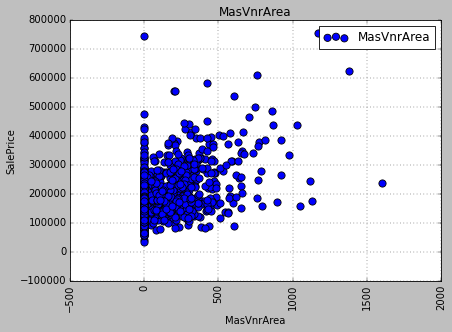

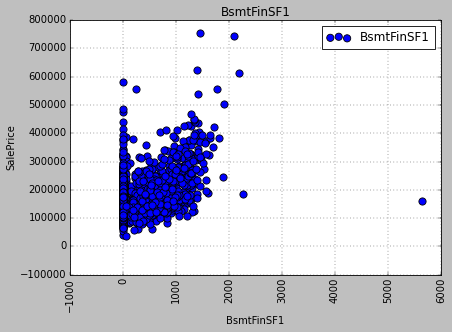

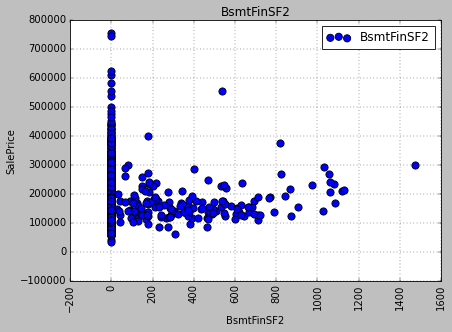

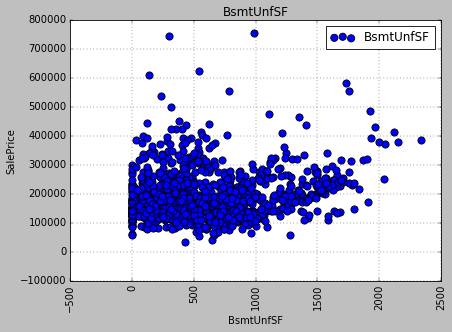

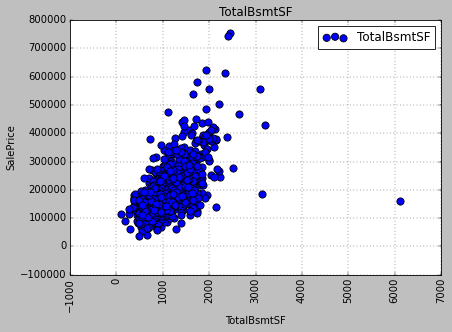

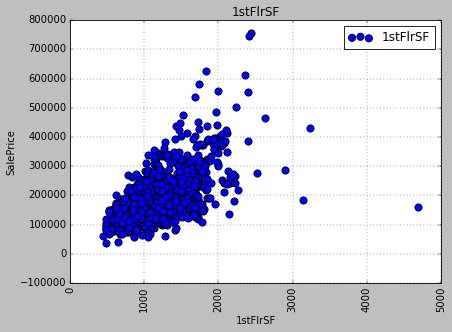

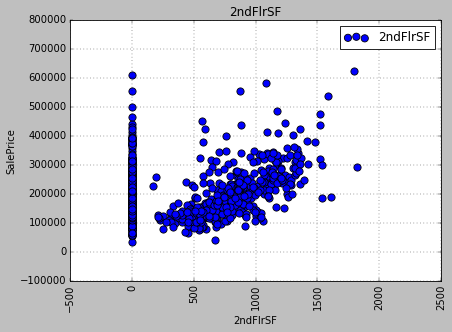

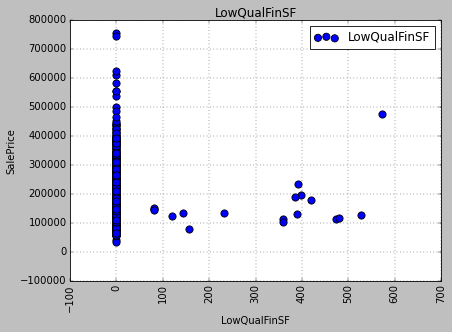

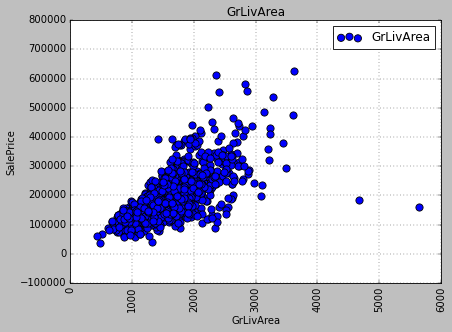

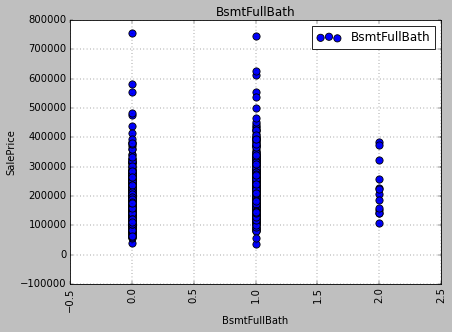

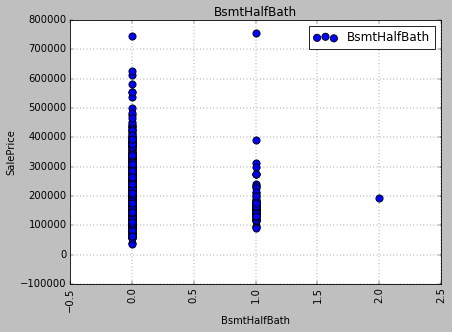

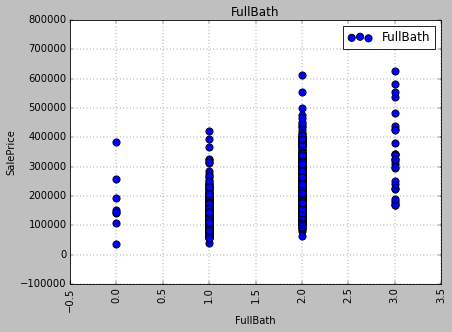

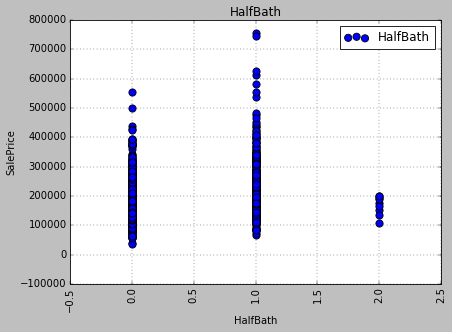

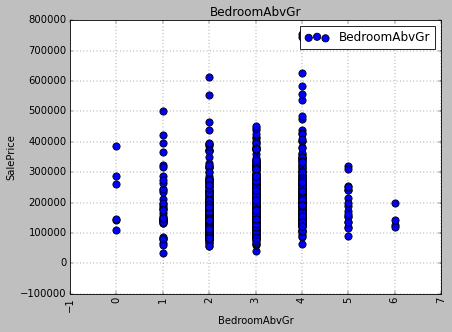

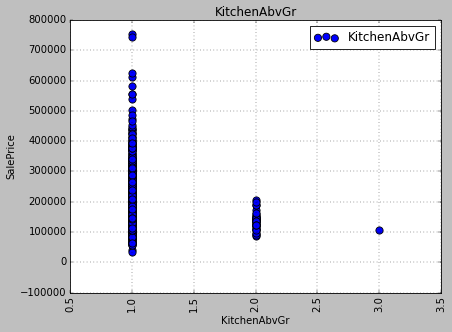

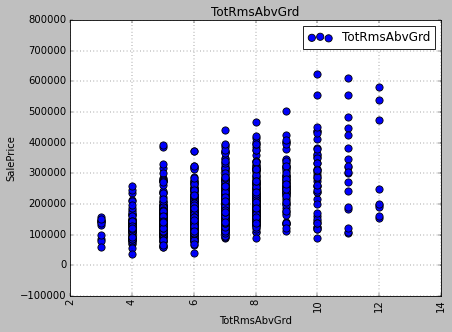

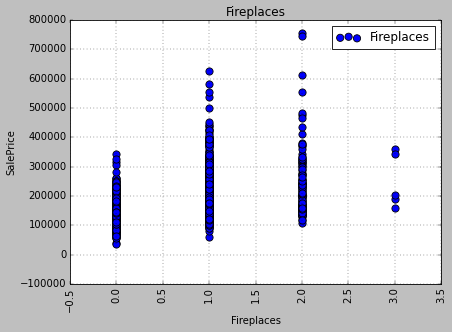

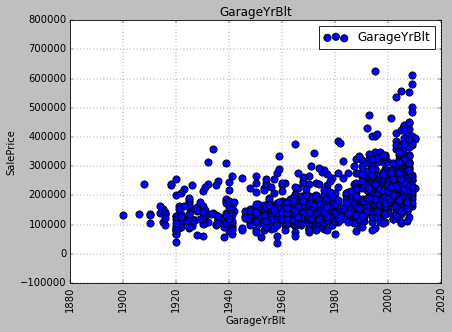

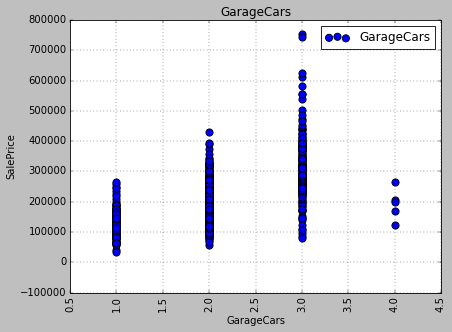

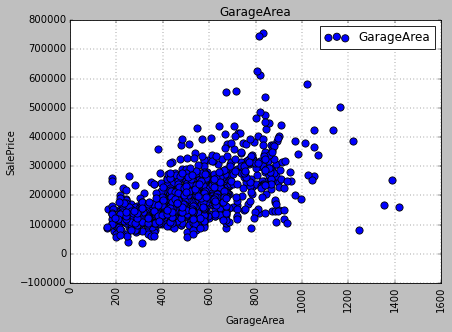

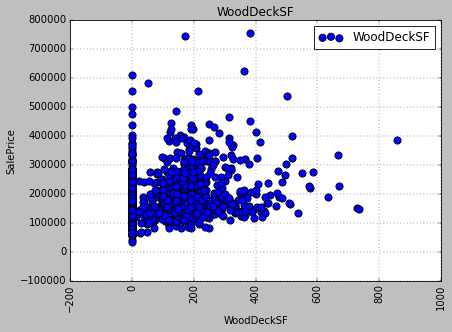

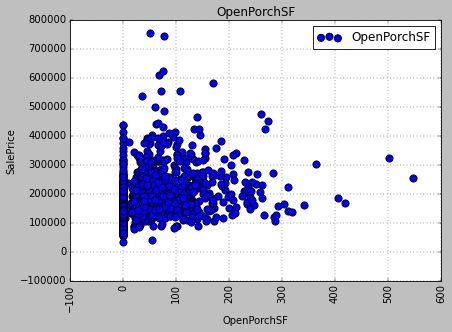

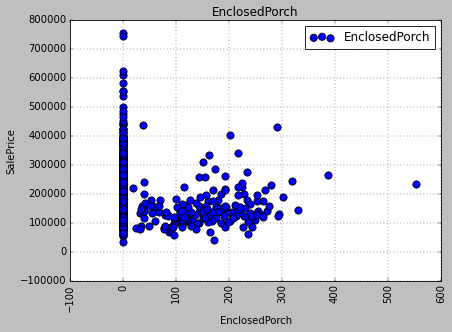

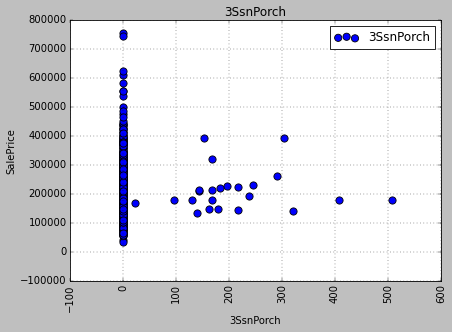

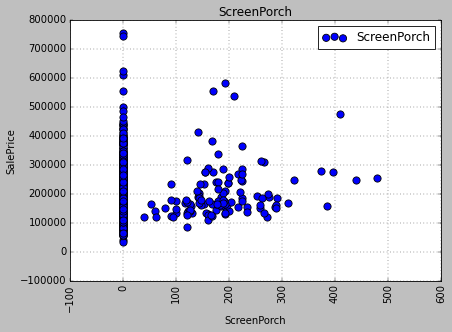

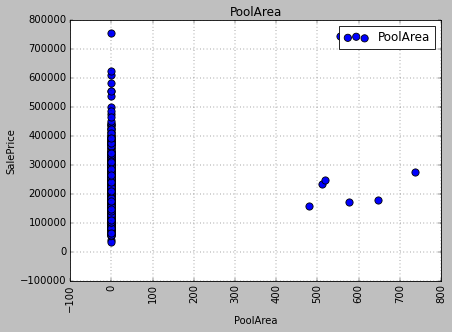

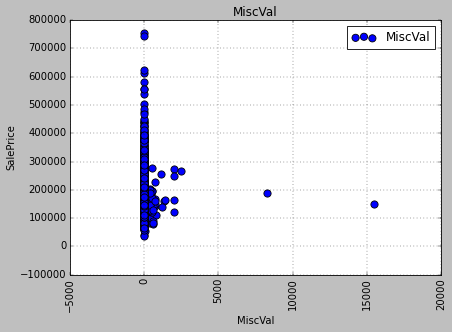

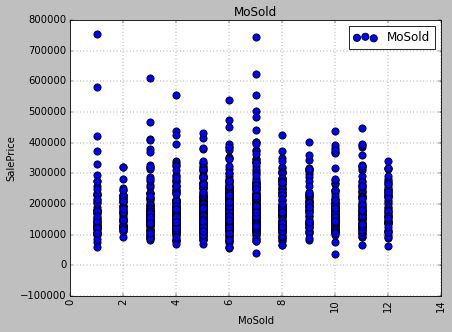

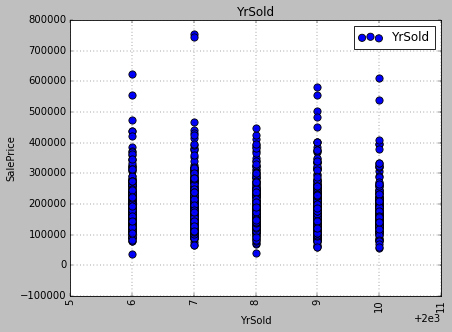

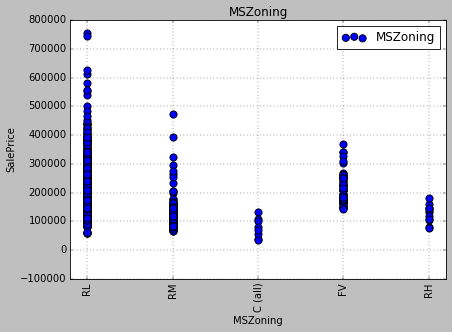

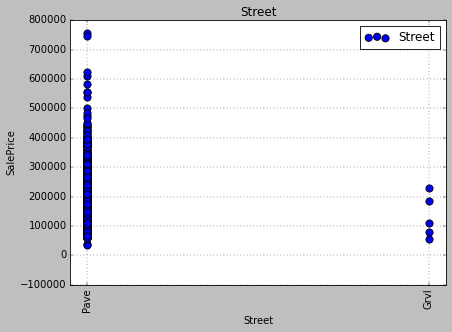

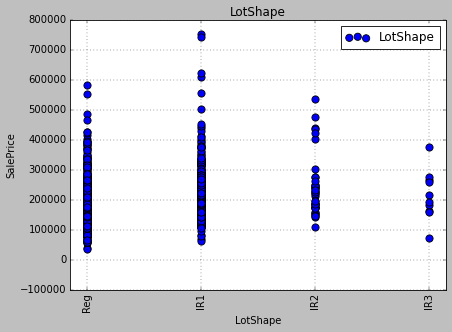

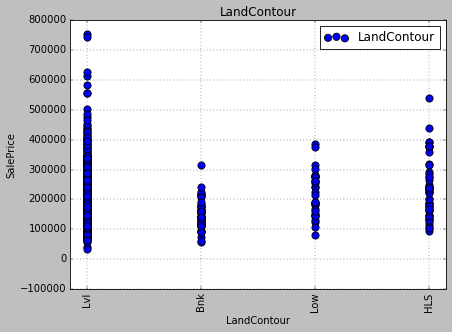

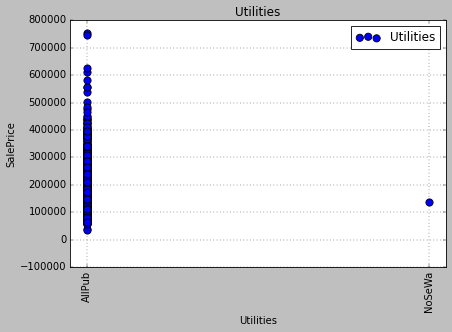

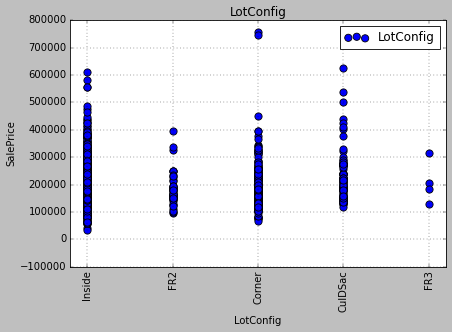

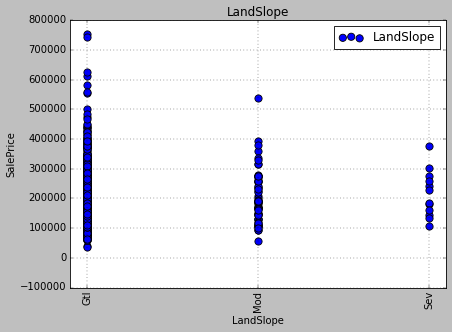

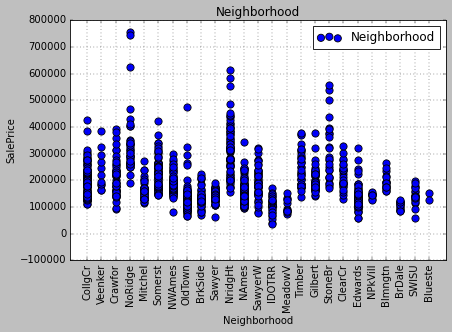

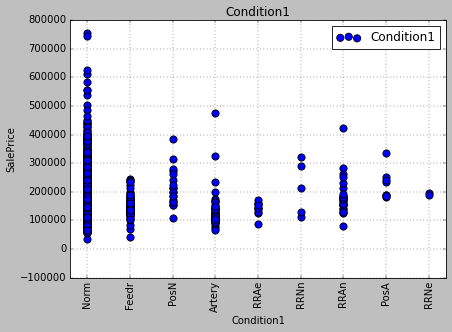

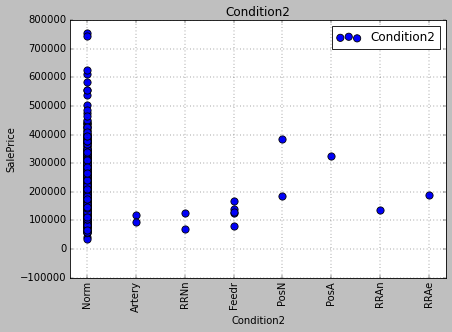

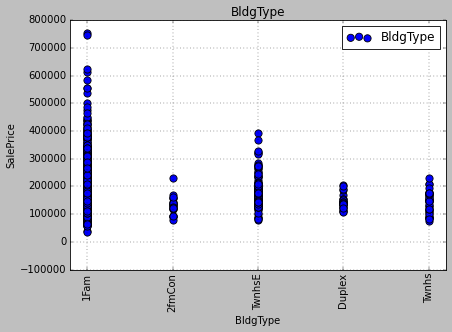

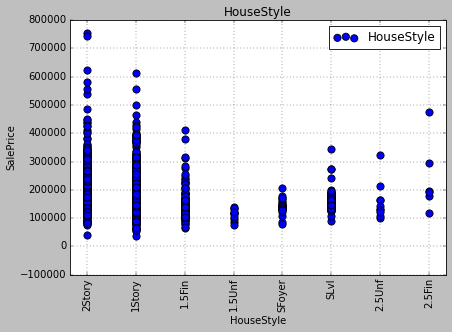

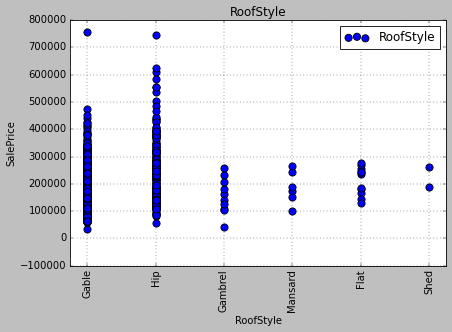

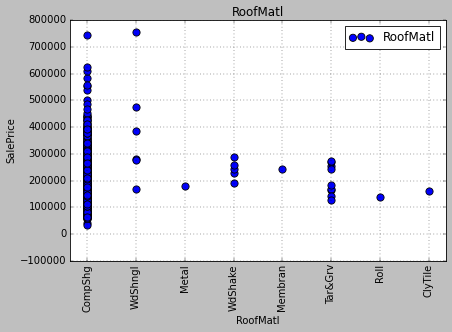

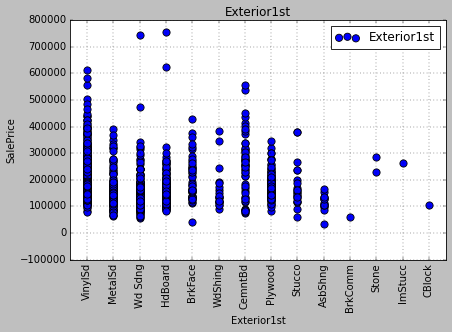

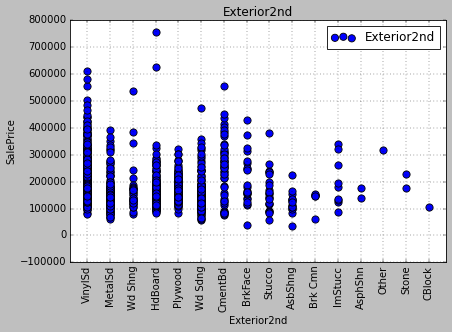

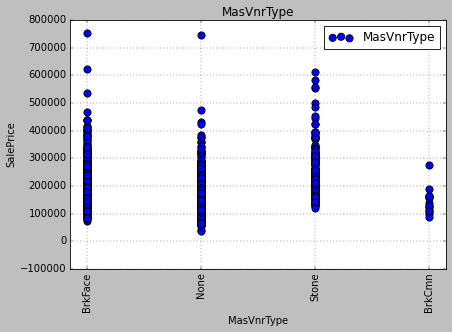

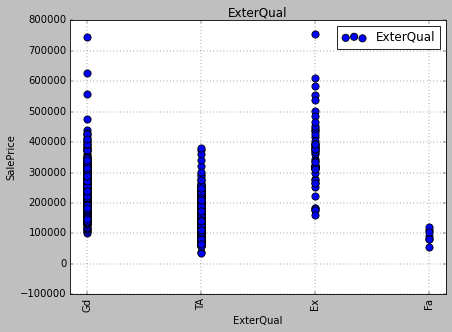

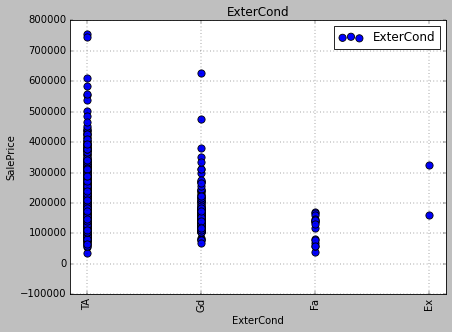

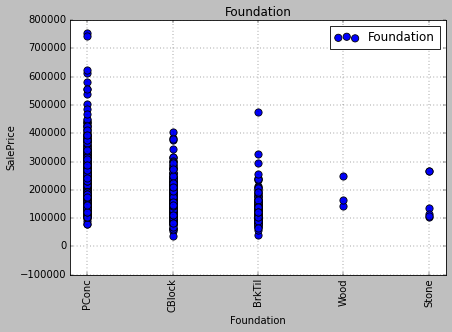

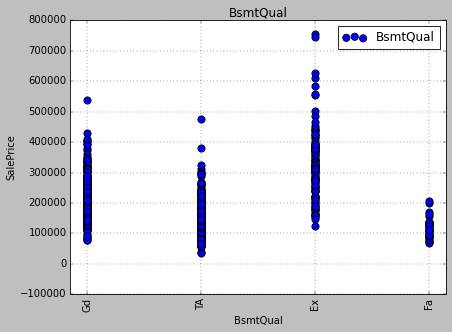

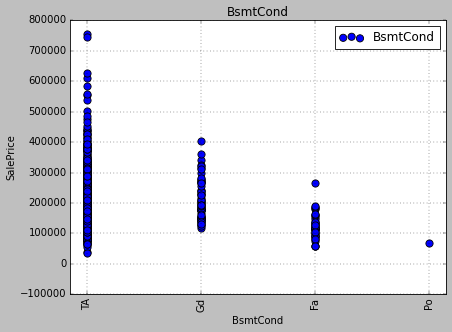

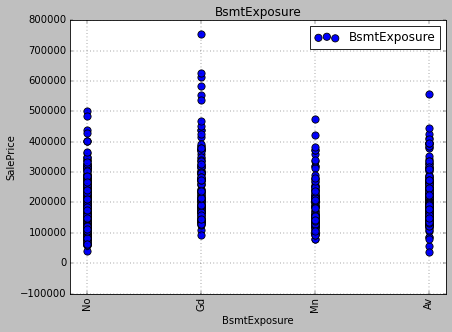

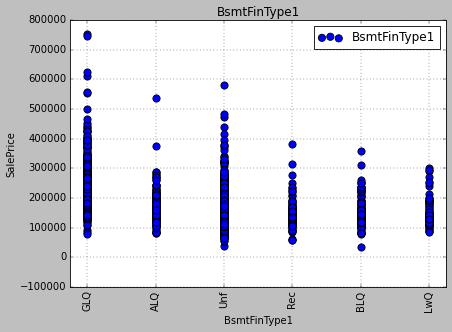

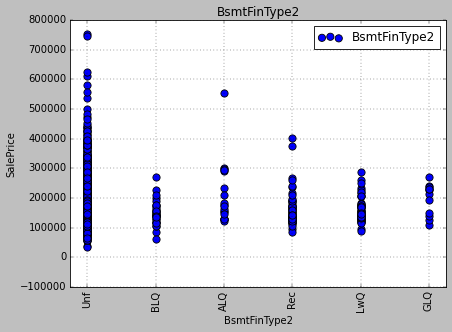

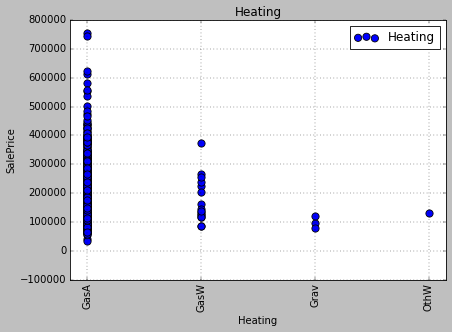

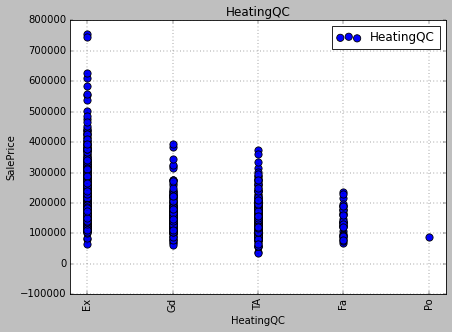

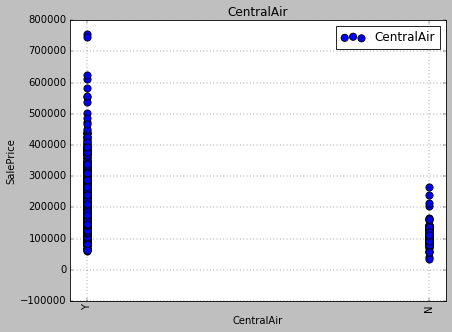

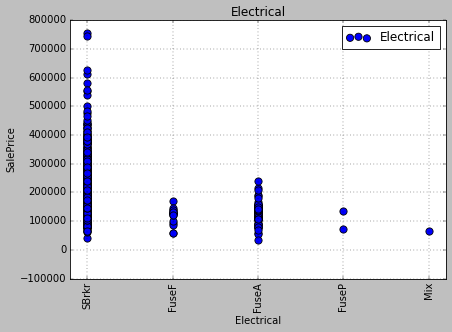

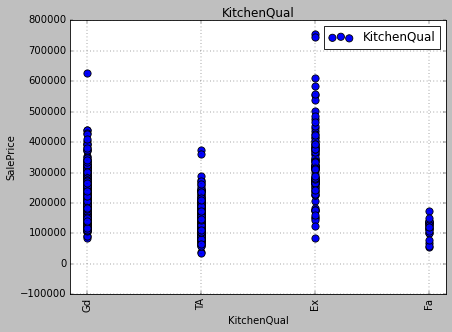

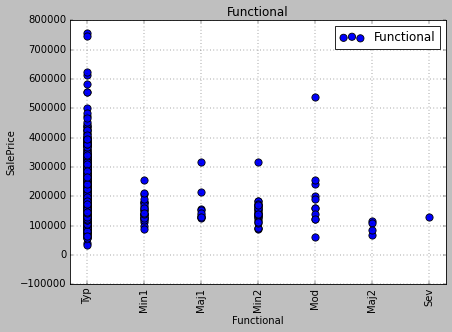

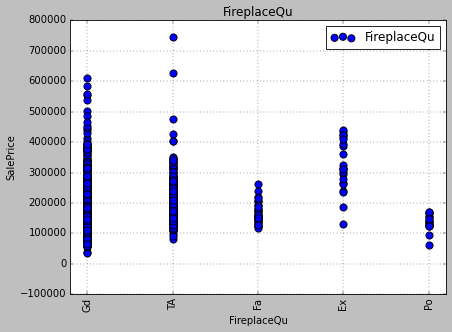

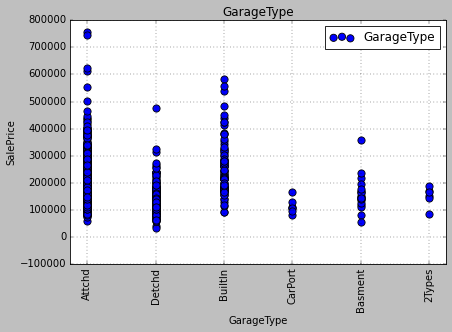

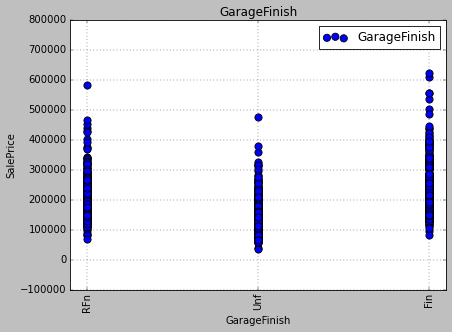

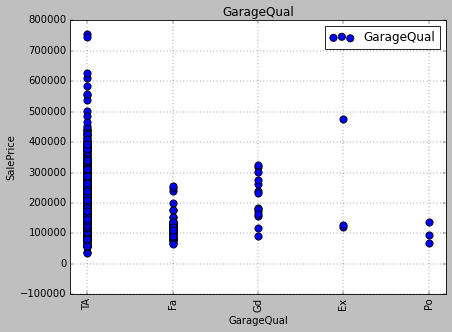

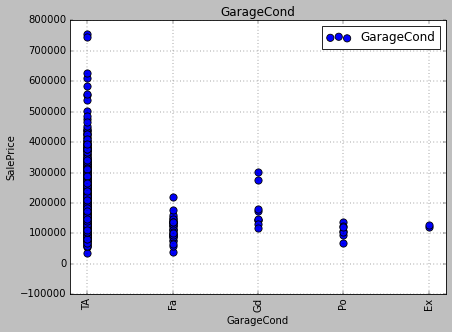

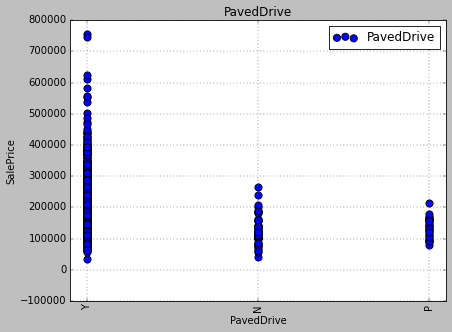

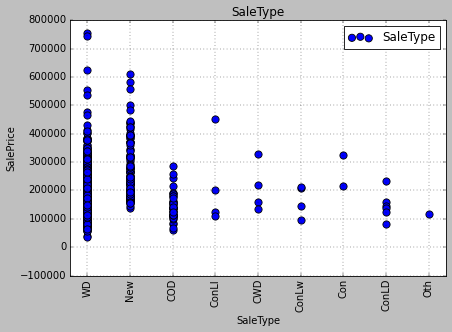

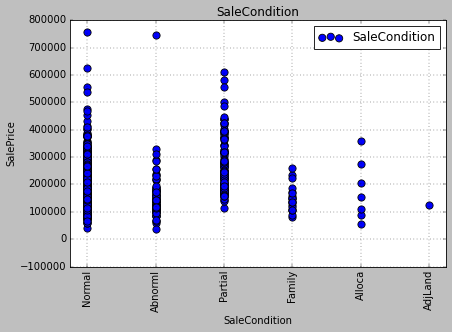

In [6]:
try:
    print("Scatter Plots Visualization")
    print("=="*50)
    plt.style.use('classic')
    fig = plt.figure(figsize=(30,70))
    if(os.path.isdir(path+"/plots")):
        shutil.rmtree(path+"/plots")
        os.mkdir(path+"/plots")
    else:
        os.mkdir(path+"/plots")
    if(os.path.isdir(path+"/plots/scatter_plot")):
        shutil.rmtree(path+"/plots/scatter_plot")
        os.mkdir(path+"/plots"+"/scatter_plot")
    else:
        os.mkdir(path+"/plots"+"/scatter_plot")
    for i in df.columns[df.dtypes != "object"]:
        if(i == "SalePrice"):
            continue
        plt.figure(dpi = 60)
        plt.scatter(df[i], df["SalePrice"],label=i,s=75)
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.title(i)
        plt.xticks(rotation = 90)
        plt.grid(True)
        plt.tight_layout(pad = 2)
        plt.legend()
        plt.savefig(path + "/plots/scatter_plot/"+str(i)+".png") 
        
    for i in df.columns[df.dtypes == "object"]:
        plt.figure(dpi = 60)
        plt.scatter(df[i], df["SalePrice"],label=i,s=75)
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.title(i)
        plt.xticks(rotation = 90)
        plt.grid(True)
        plt.tight_layout(pad = 2)
        plt.legend()
        plt.savefig(path + "/plots/scatter_plot/"+str(i)+".png") 
    print("=="*50)
except Exception as e:
    print(e)

Bar Plots Visualization


<ipython-input-7-9d66235de824>:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 2400x5600 with 0 Axes>

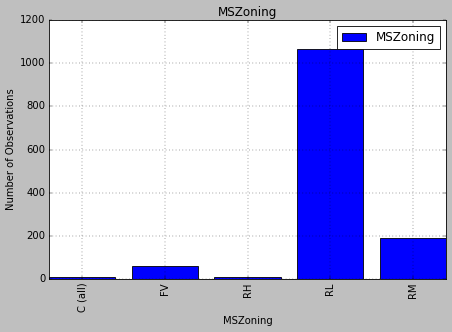

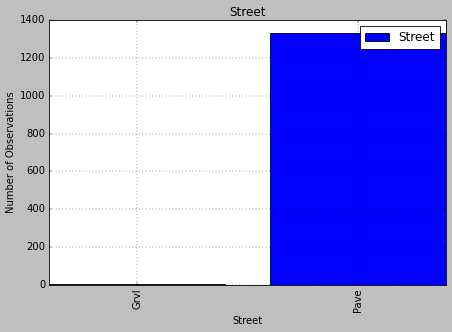

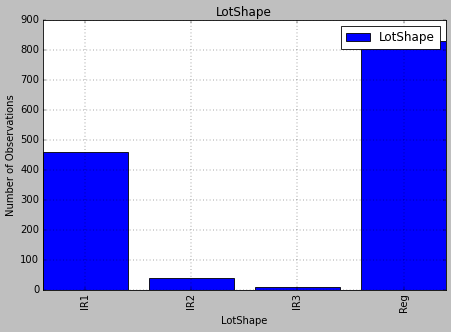

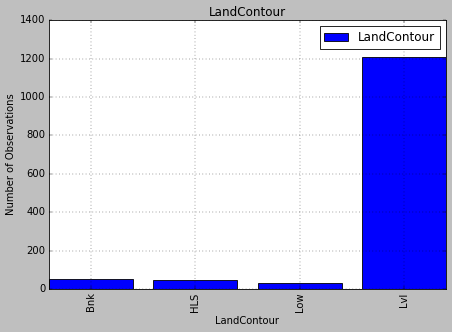

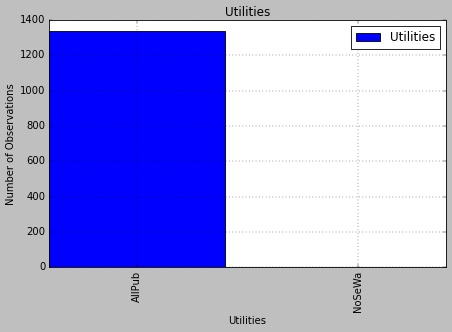

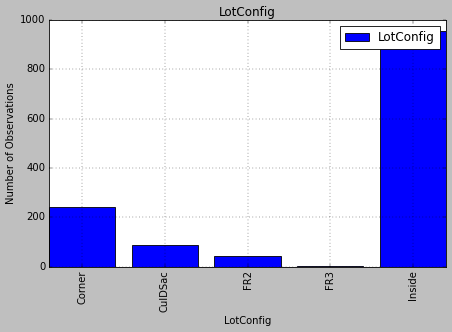

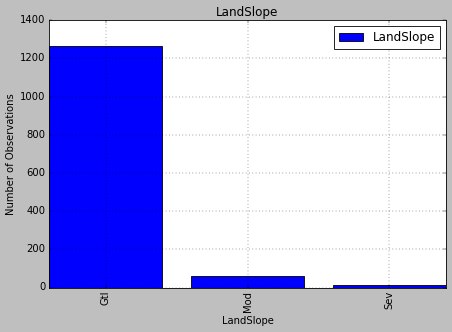

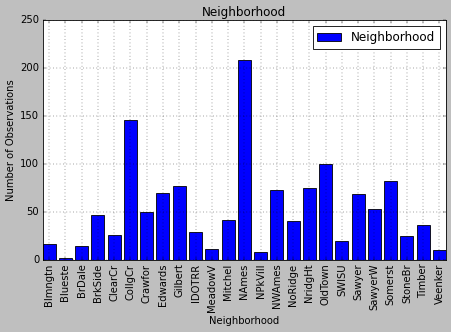

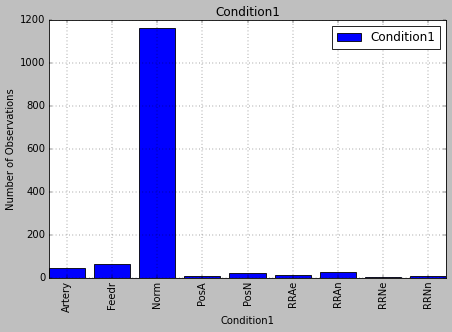

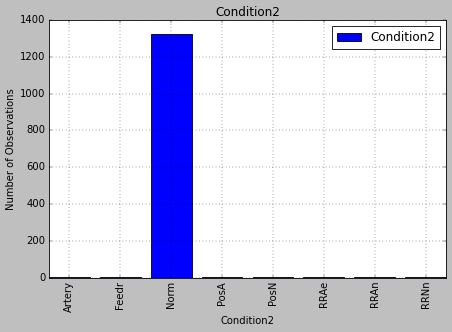

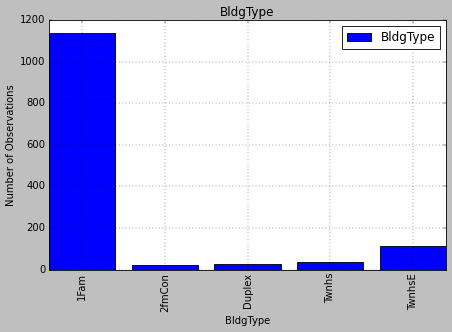

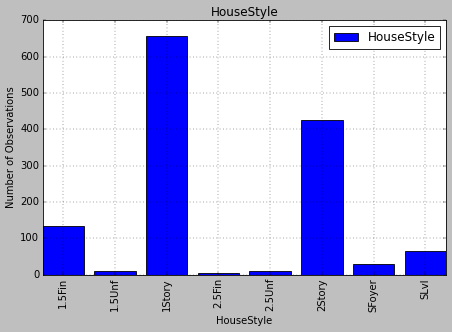

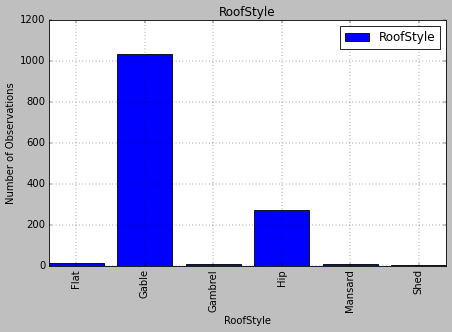

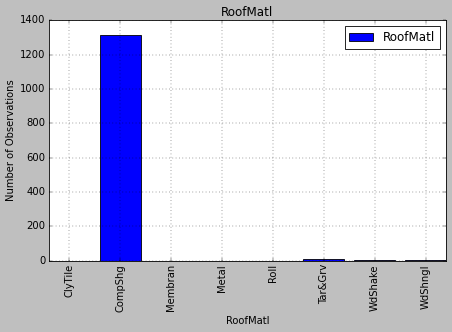

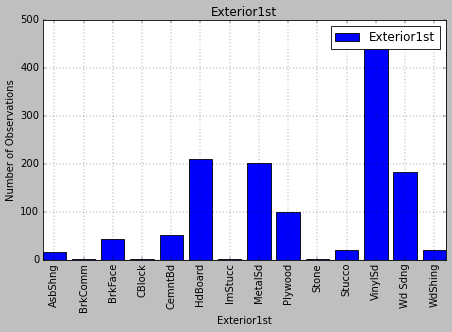

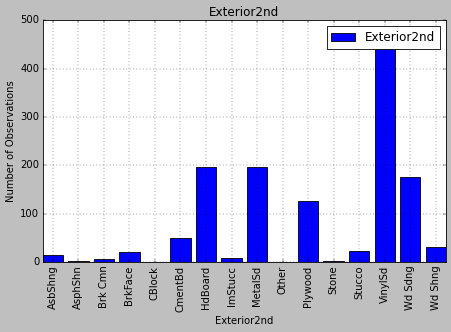

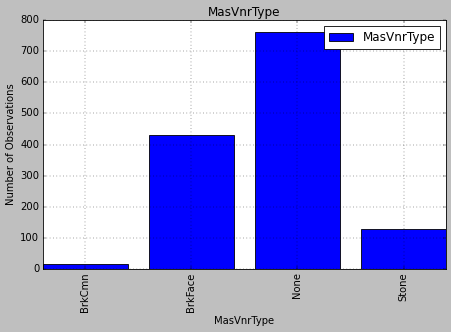

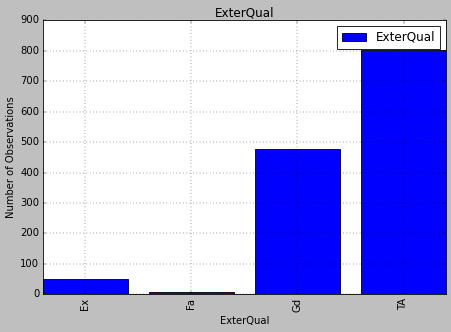

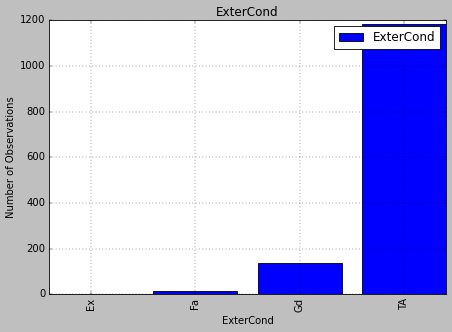

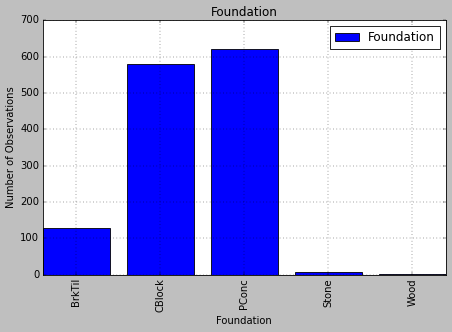

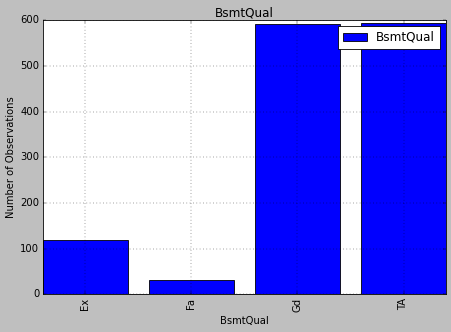

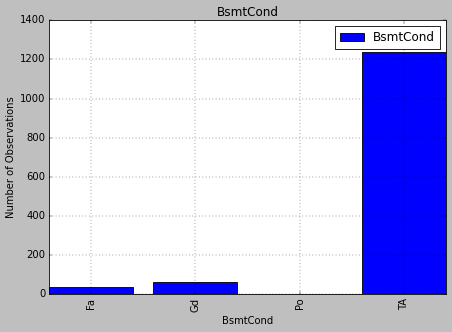

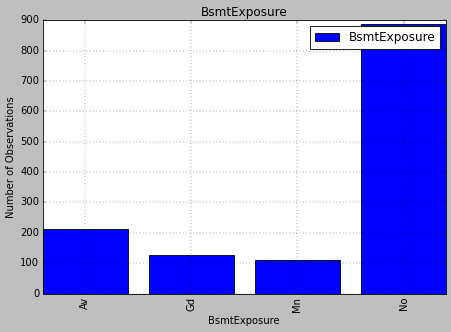

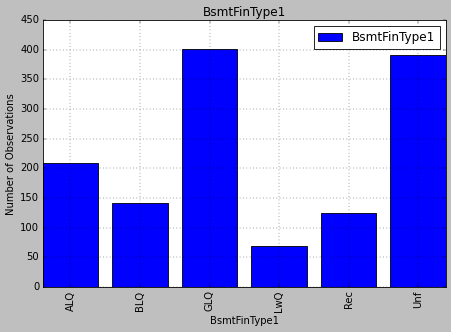

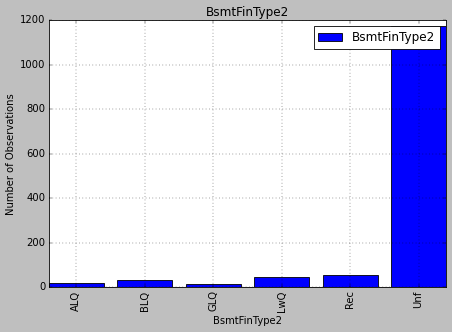

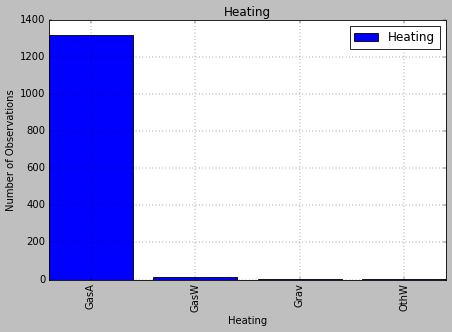

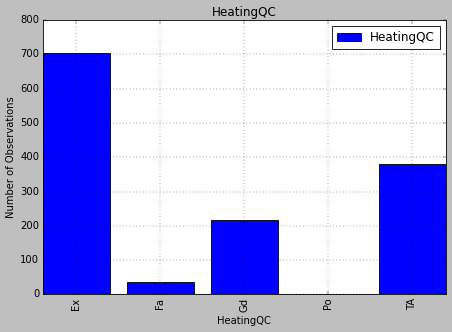

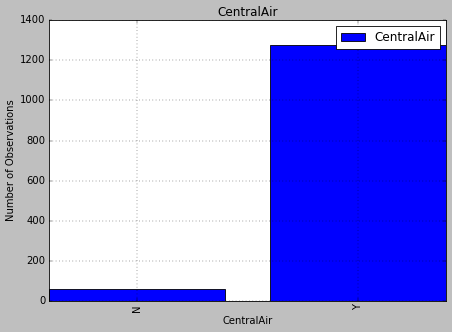

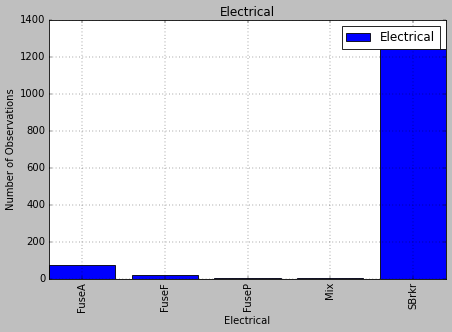

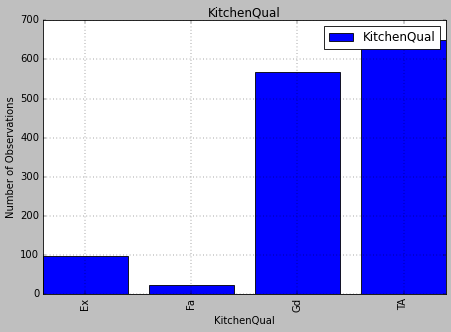

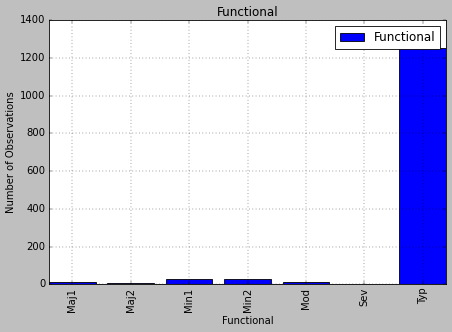

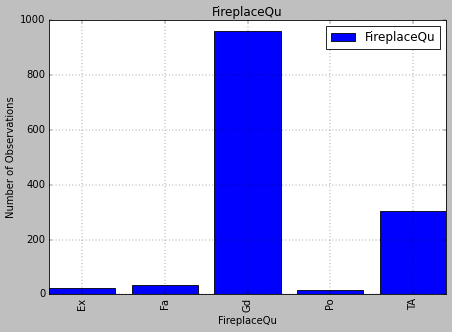

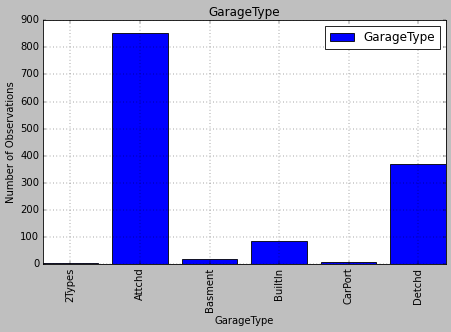

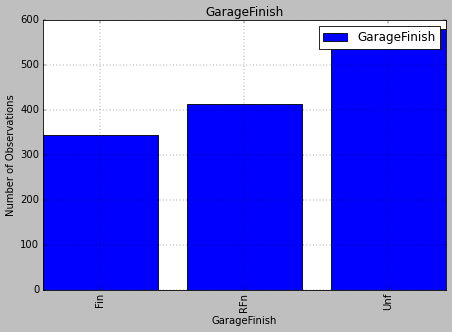

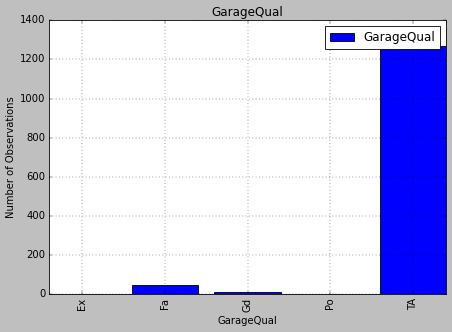

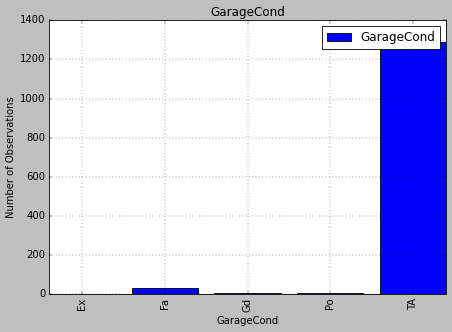

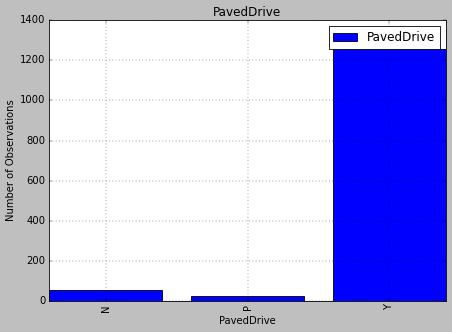

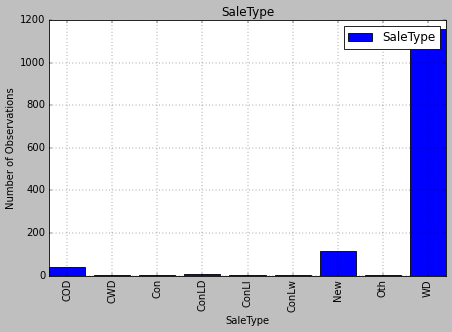

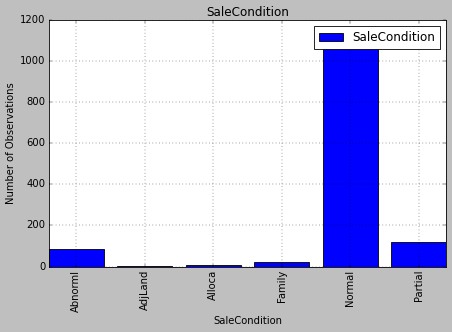

In [7]:
try:
    print("Bar Plots Visualization")
    print("=="*50)
    plt.style.use('classic')
    fig = plt.figure(figsize=(30,70))
    
    if(os.path.isdir(path+"/plots/bar_plot")):
        shutil.rmtree(path+"/plots/bar_plot")
        os.mkdir(path+"/plots"+"/bar_plot")
    else:
        os.mkdir(path+"/plots"+"/bar_plot")
        
    for i in df.columns[df.dtypes == "object"]:
        
        score = []
        for j in pd.Categorical(df[i]).categories:
            score.append((df[i] == j).sum())
        plt.figure(dpi = 60)
        plt.bar(pd.Categorical(df[i]).categories , score , label = i)
        plt.xlabel(i)
        plt.ylabel("Number of Observations")
        plt.title(i)
        plt.xticks(rotation = 90)
        plt.grid(True)
        plt.tight_layout(pad = 2)
        plt.legend()
        plt.savefig(path + "/plots/bar_plot/"+str(i)+".png") 
    print("=="*50)
except Exception as e:
    print(e)

Pie Plots Visualization


<ipython-input-8-7e19bb684194>:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 2400x5600 with 0 Axes>

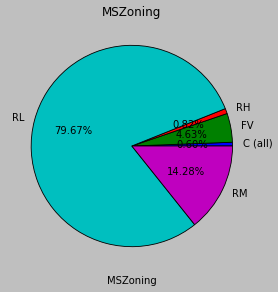

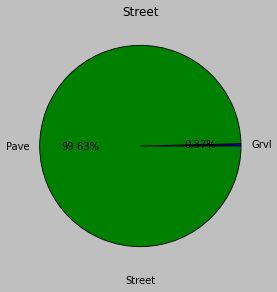

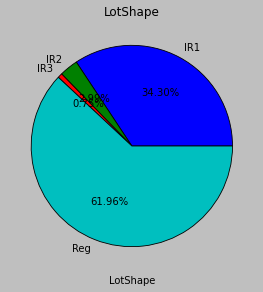

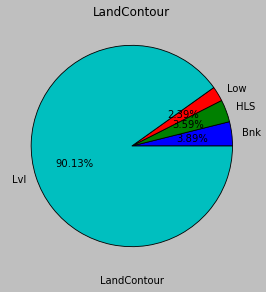

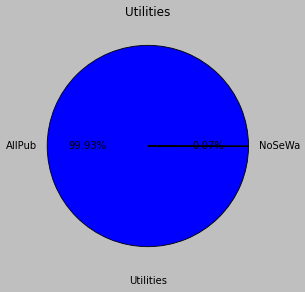

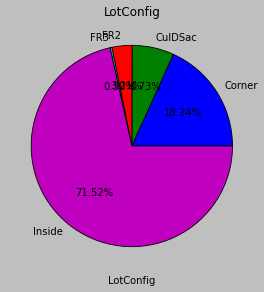

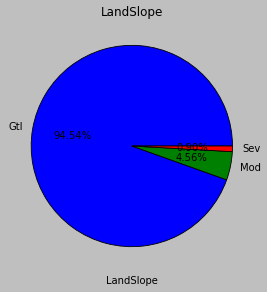

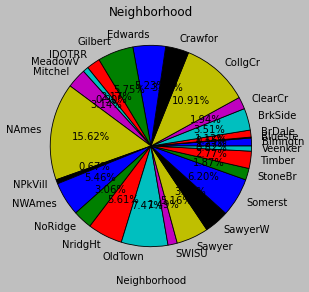

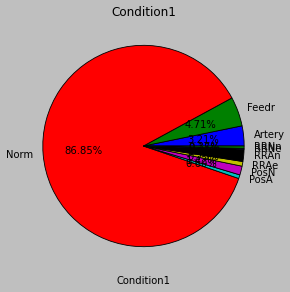

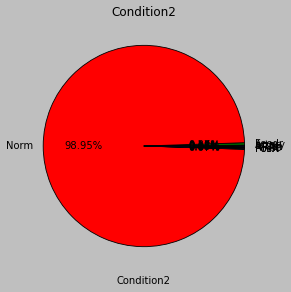

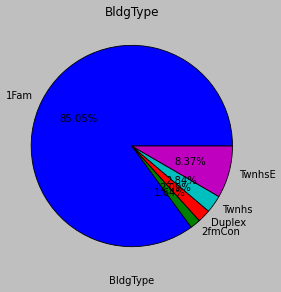

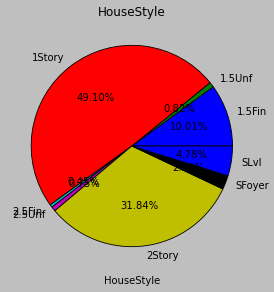

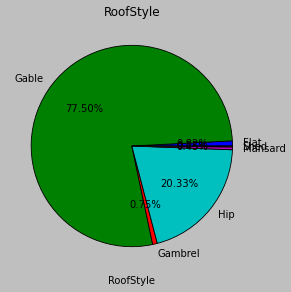

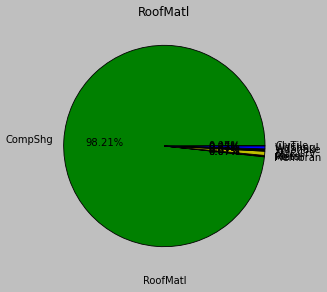

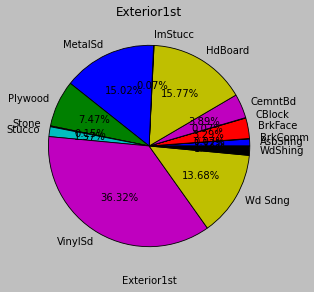

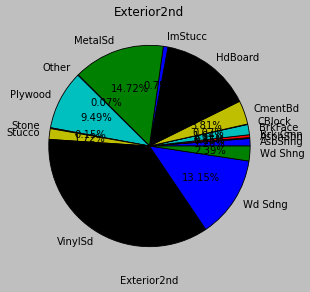

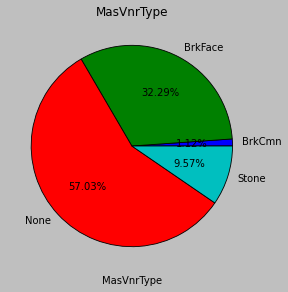

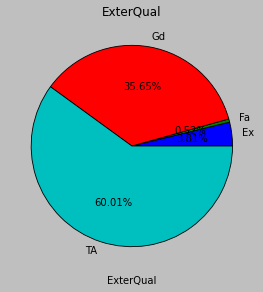

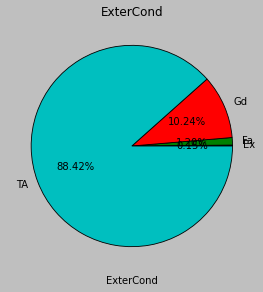

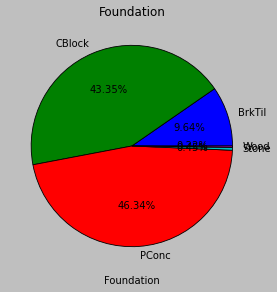

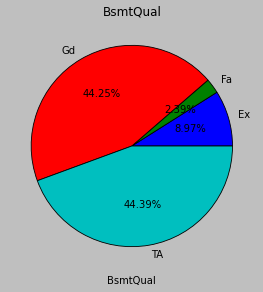

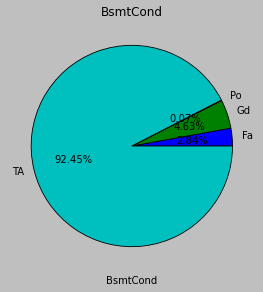

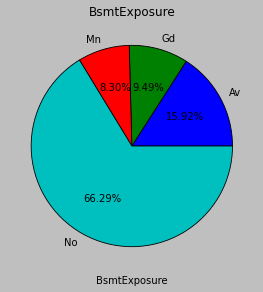

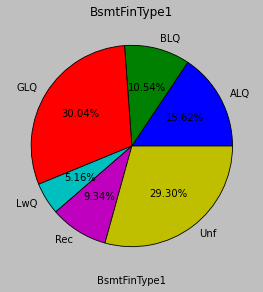

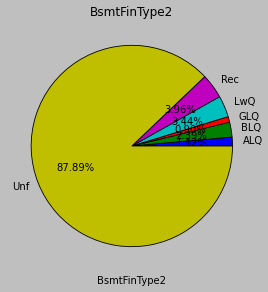

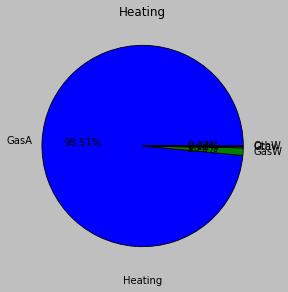

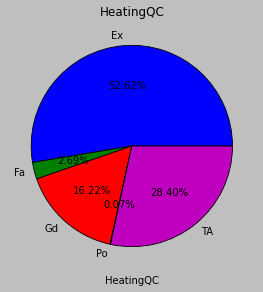

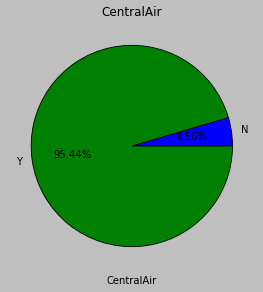

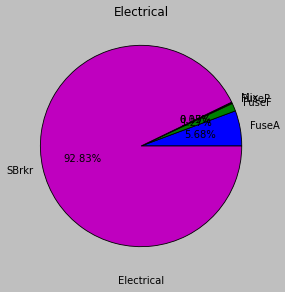

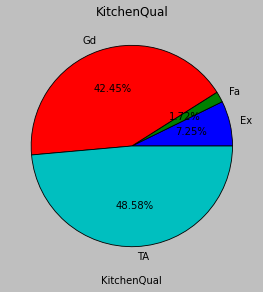

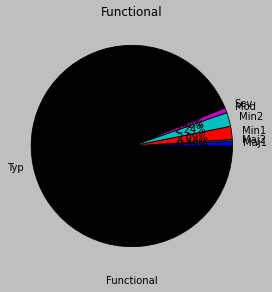

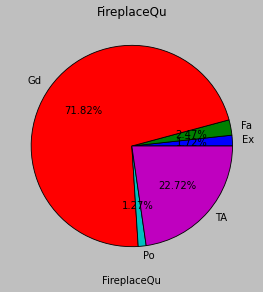

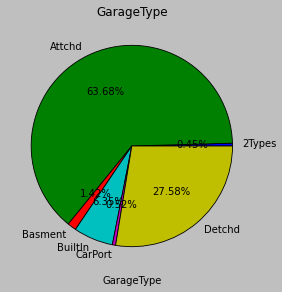

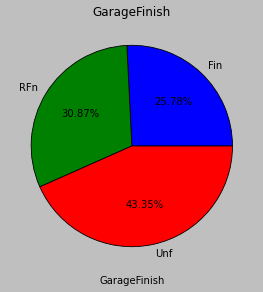

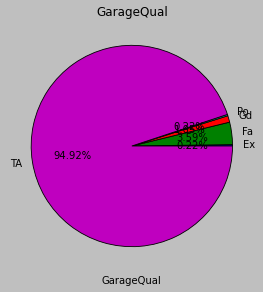

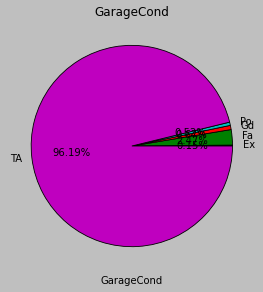

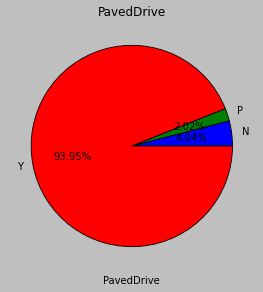

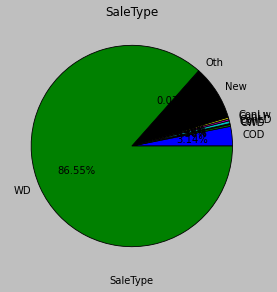

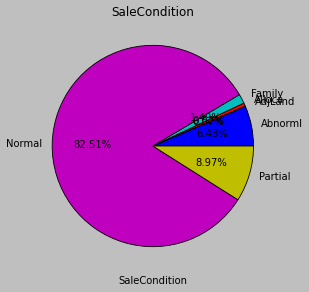

In [8]:
try:
    print("Pie Plots Visualization")
    print("=="*50)
    plt.style.use('classic')
    fig = plt.figure(figsize=(30,70))
    
    if(os.path.isdir(path+"/plots/pie_plot")):
        shutil.rmtree(path+"/plots/pie_plot")
        os.mkdir(path+"/plots"+"/pie_plot")
    else:
        os.mkdir(path+"/plots"+"/pie_plot")
        
    for i in df.columns[df.dtypes == "object"]:
        
        score = []
        for j in pd.Categorical(df[i]).categories:
            score.append((df[i] == j).sum())
        plt.figure(dpi = 60)
        plt.pie(score, labels=pd.Categorical(df[i]).categories , autopct='%1.2f%%')
        plt.xlabel(i)
        plt.title(i)
        plt.tight_layout(pad = 4)
        plt.savefig(path + "/plots/pie_plot/"+str(i)+".png") 
    print("=="*50)
except Exception as e:
    print(e)

Distribution Plots Visualization


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

<ipython-input-9-9edbda3b11e1>:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-9-9edbda3b11e1>:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

<ipython-input-9-9edbda3b11e1>:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 2400x5600 with 0 Axes>

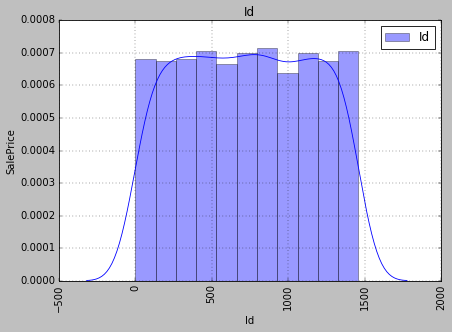

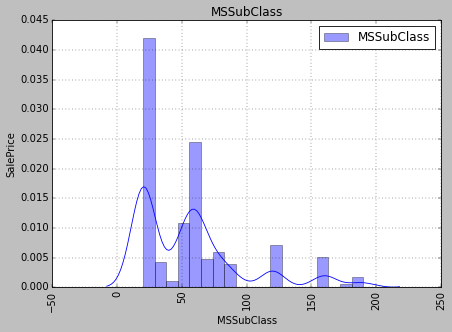

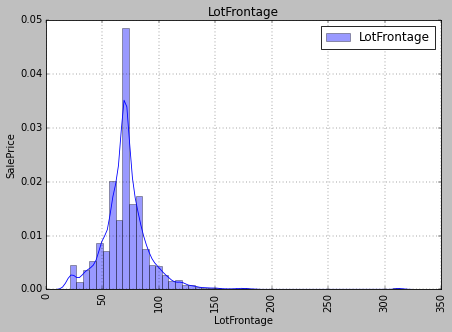

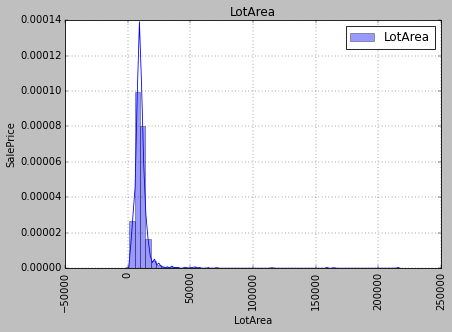

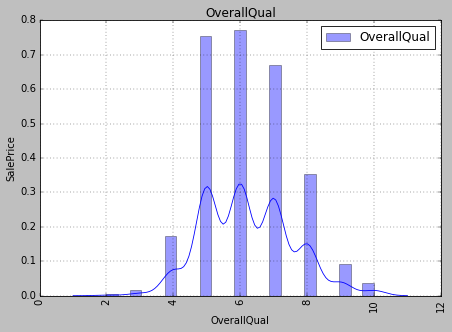

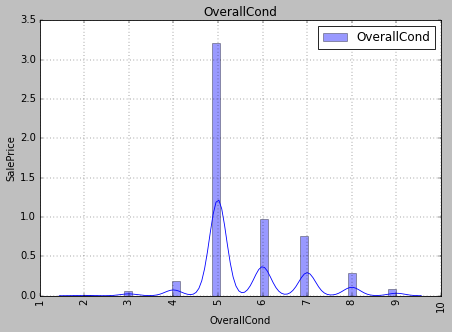

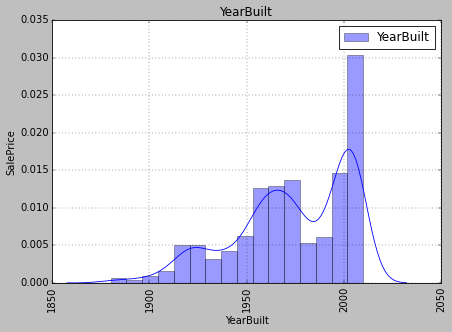

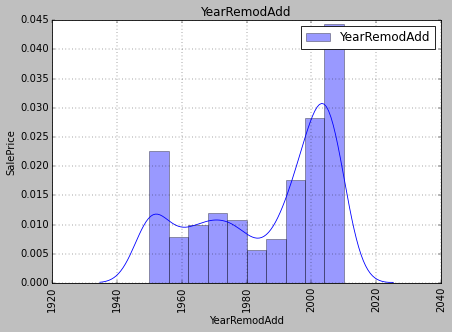

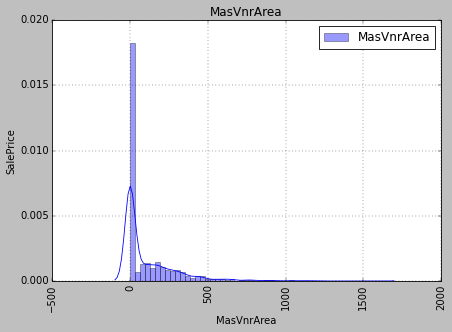

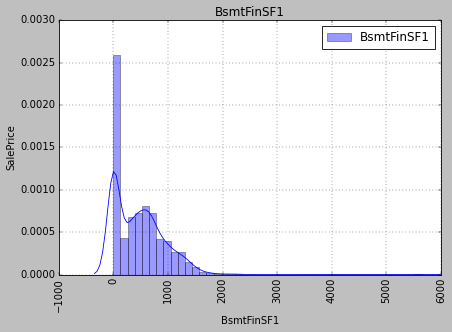

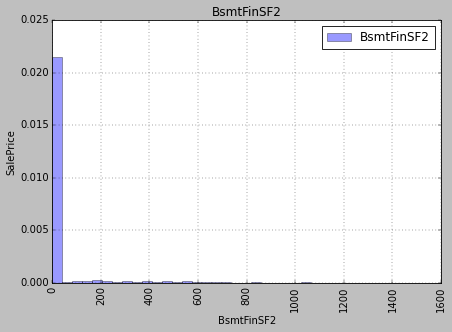

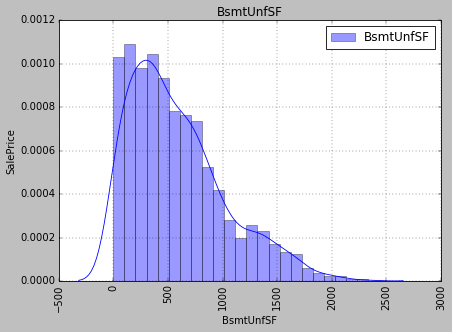

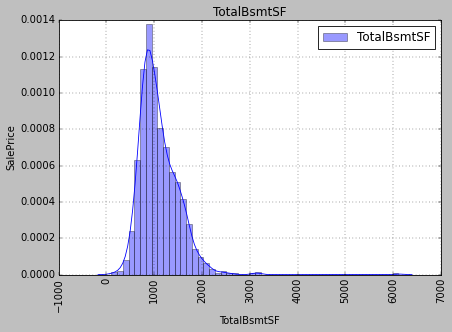

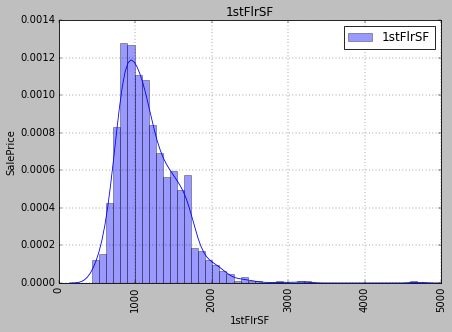

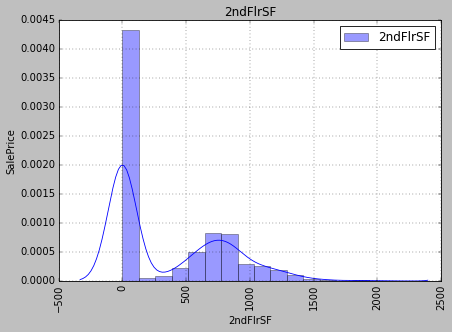

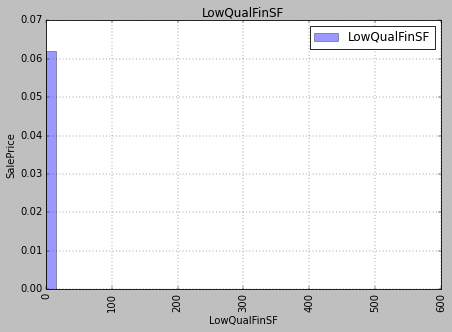

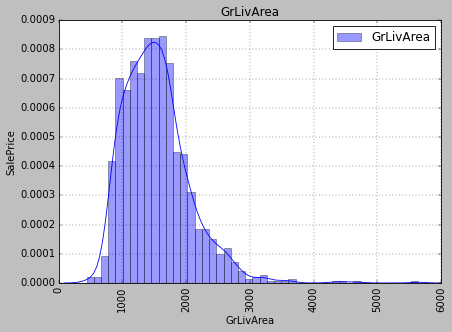

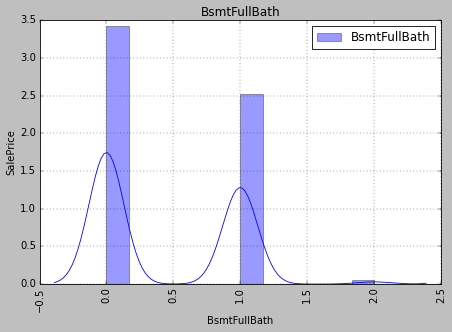

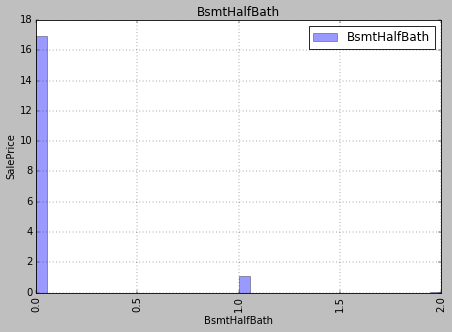

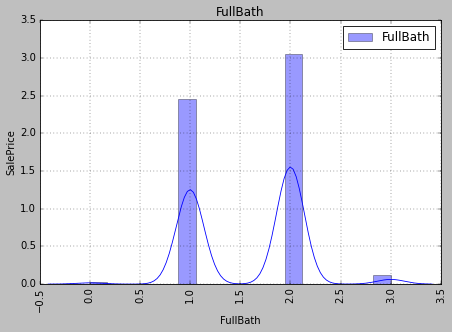

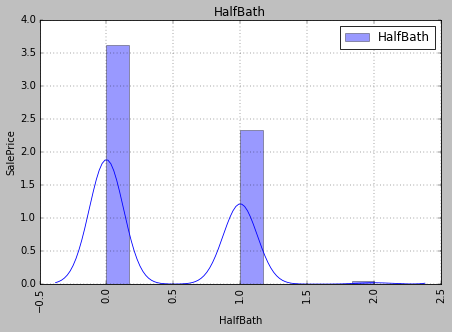

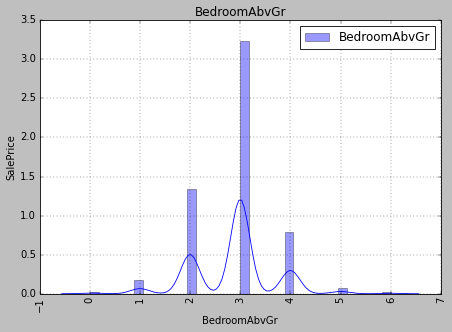

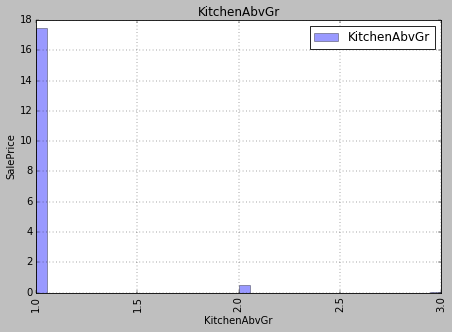

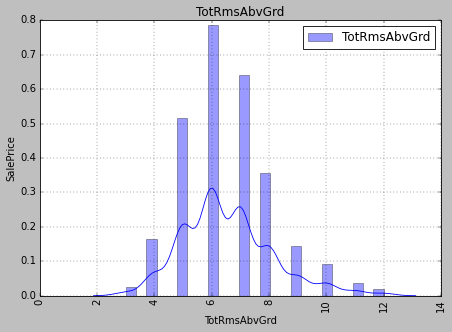

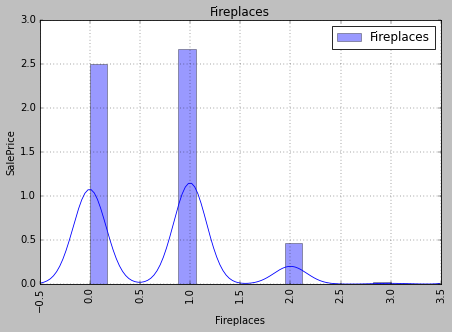

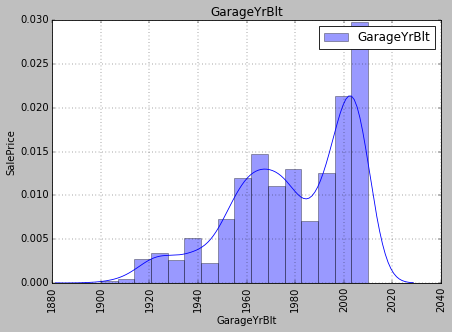

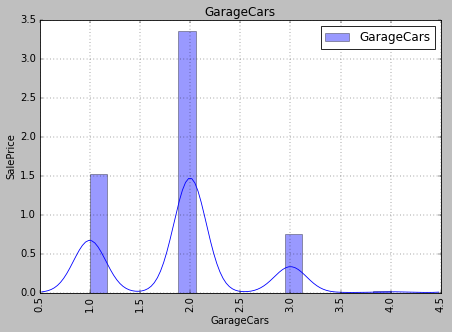

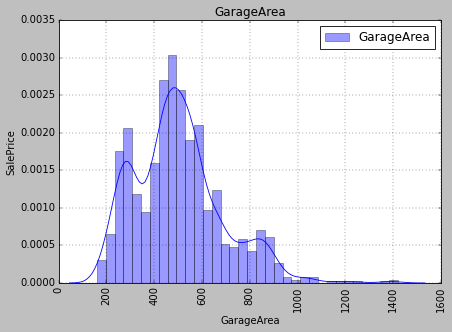

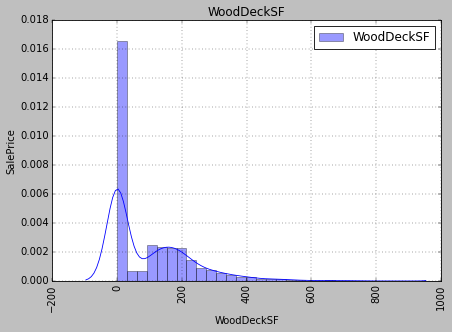

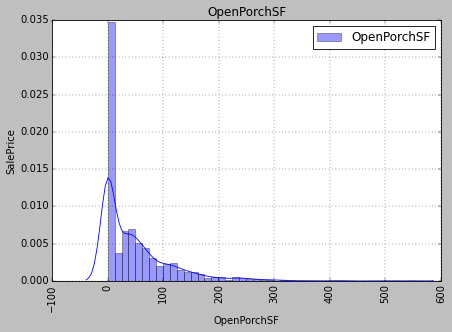

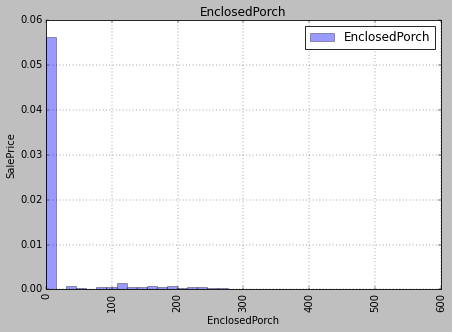

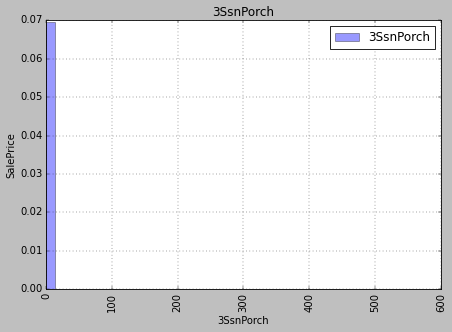

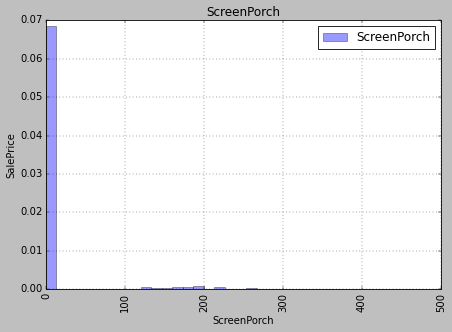

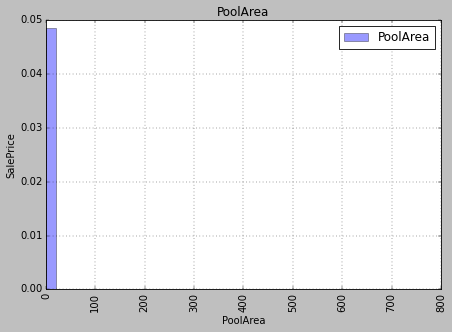

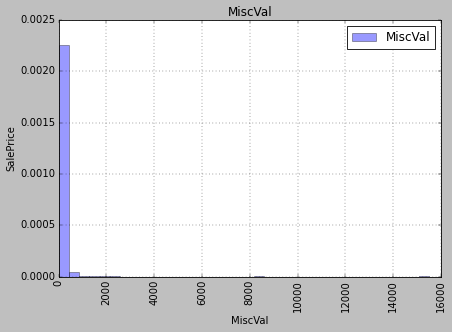

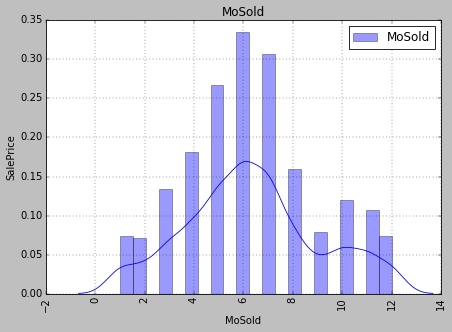

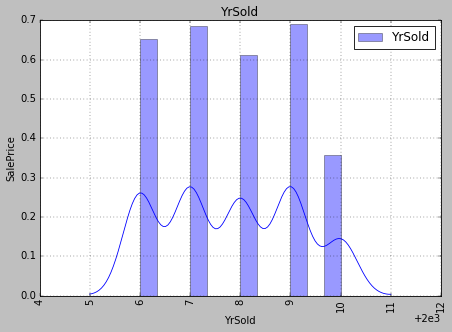

In [9]:

try:
    print("Distribution Plots Visualization")
    print("=="*50)
    plt.style.use('classic')
    fig = plt.figure(figsize=(30,70))
    if(os.path.isdir(path+"/plots/distribution_plot")):
        shutil.rmtree(path+"/plots/distribution_plot")
        os.mkdir(path+"/plots"+"/distribution_plot")
    else:
        os.mkdir(path+"/plots"+"/distribution_plot")
    for i in df.columns[df.dtypes != "object"]:
        if(i == "SalePrice"):
            continue
        plt.figure(dpi = 60)
        sns.distplot(df[i], label= i)
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.title(i)
        plt.xticks(rotation = 90)
        plt.grid(True)
        plt.tight_layout(pad = 2)
        plt.legend()
        plt.savefig(path + "/plots/distribution_plot/"+str(i)+".png")
    print("=="*50)
except Exception as e:
    print(e)

Box Plot Visualization


<ipython-input-10-240f252d7fde>:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-10-240f252d7fde>:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-10-240f252d7fde>:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-10-240f252d7fde>:14: RuntimeWarning:

More than 20 figures have 

<Figure size 2400x5600 with 0 Axes>

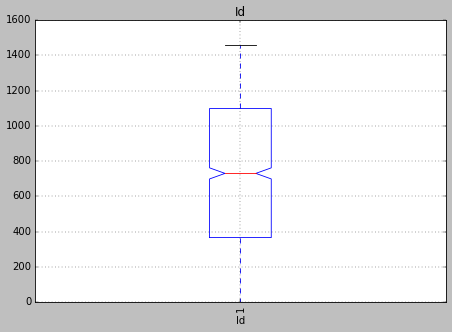

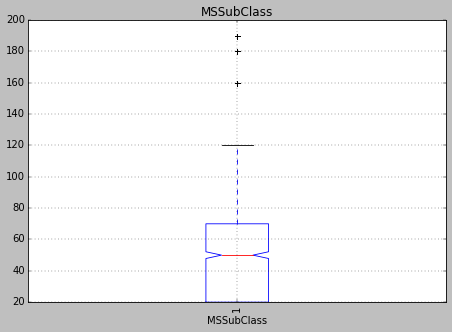

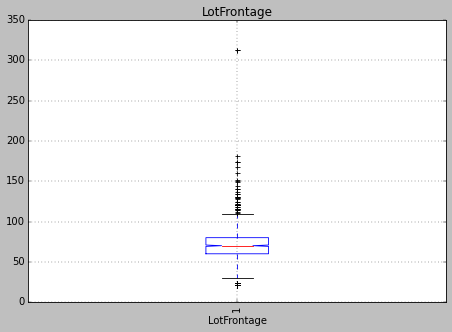

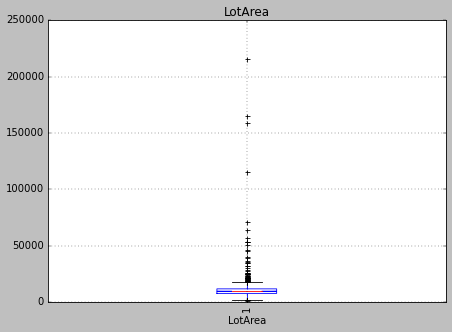

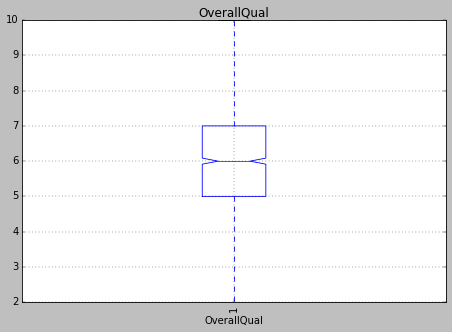

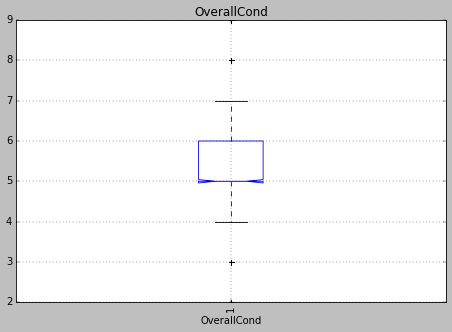

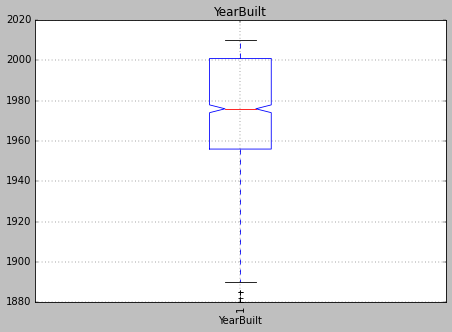

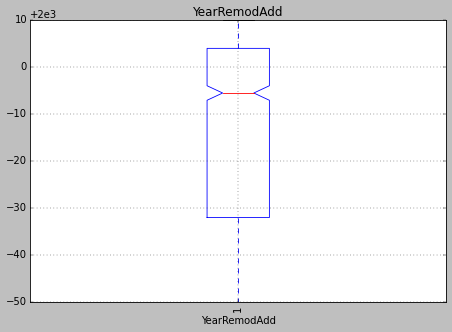

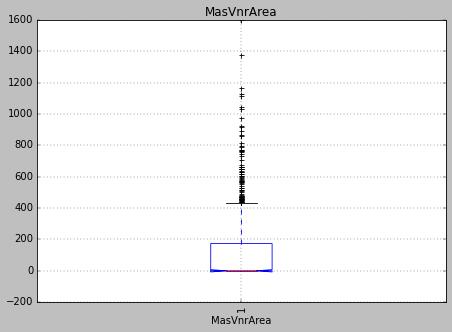

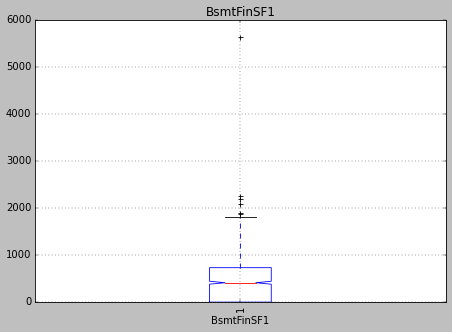

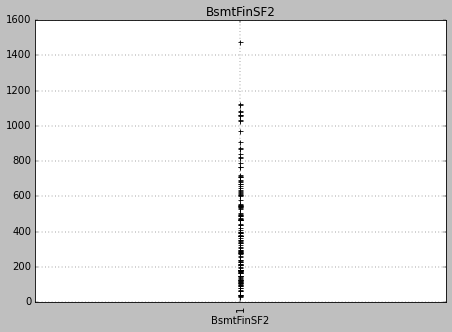

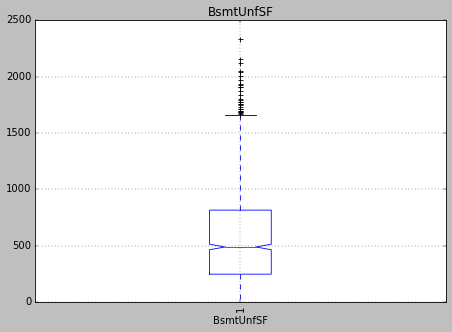

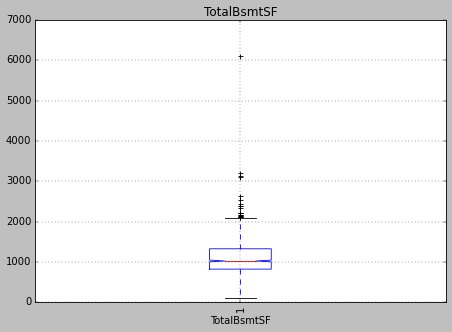

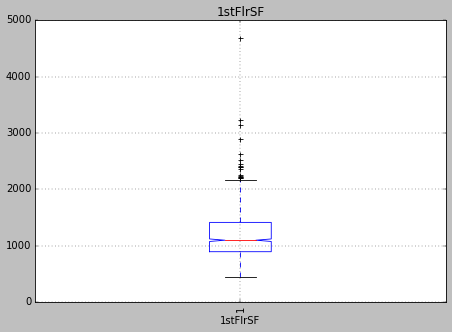

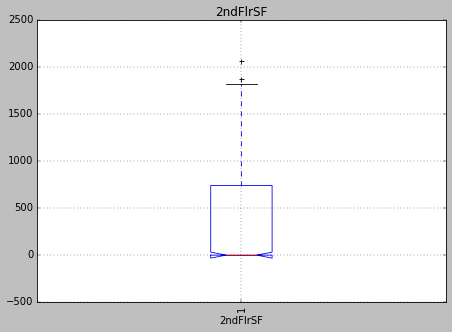

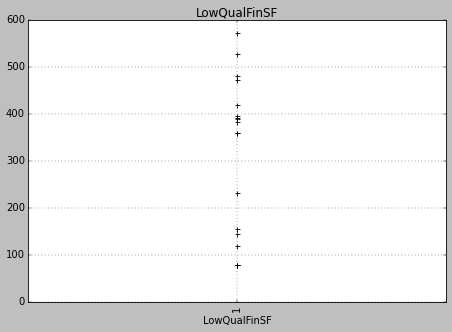

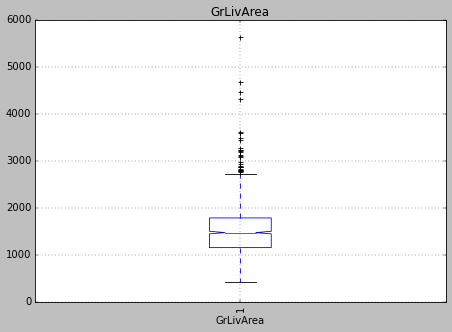

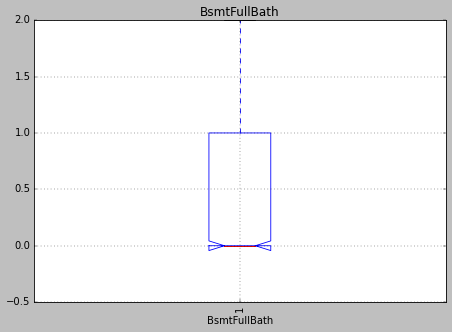

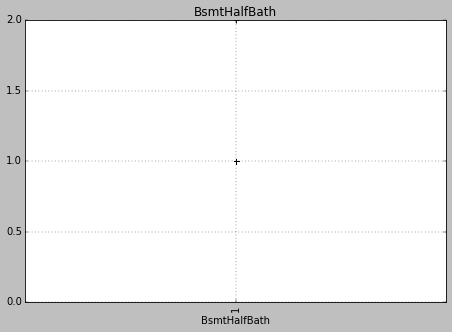

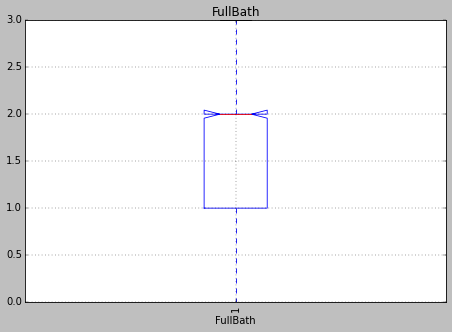

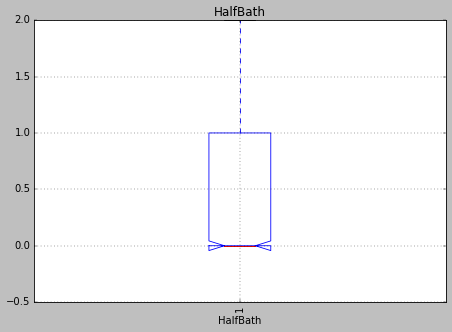

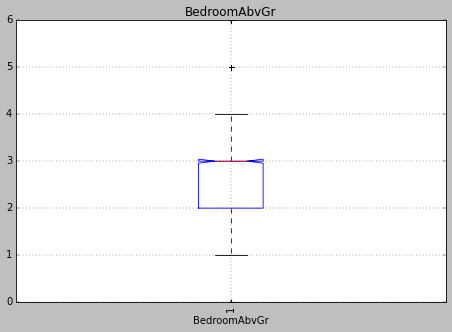

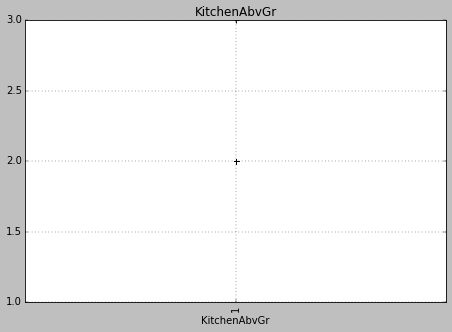

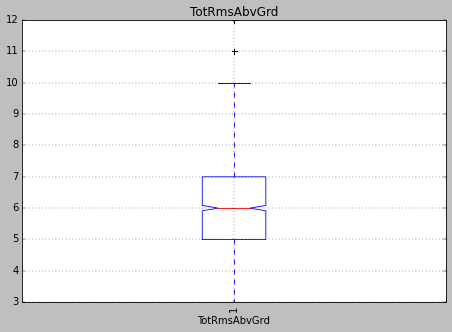

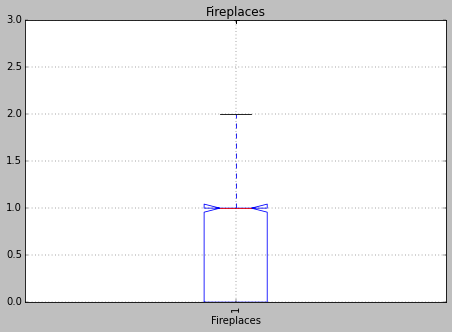

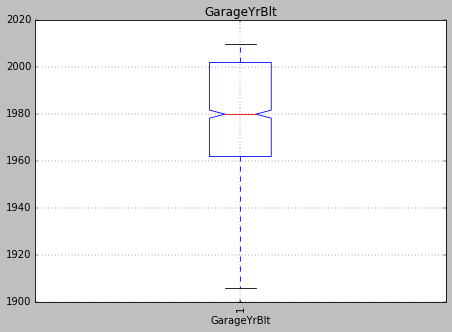

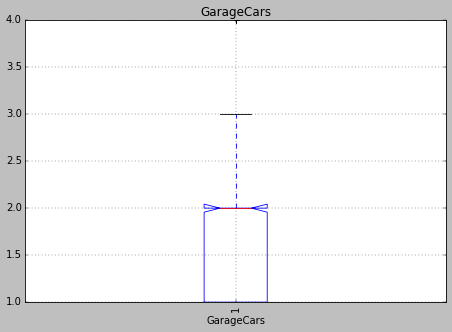

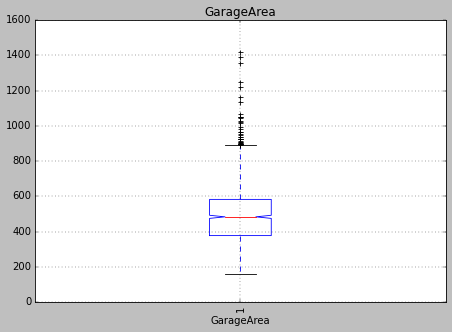

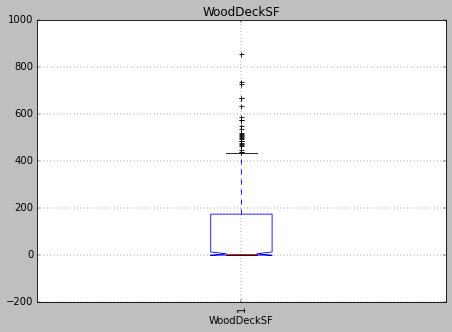

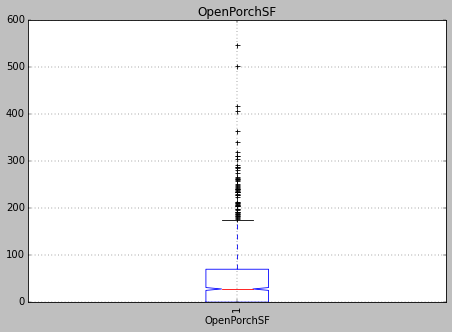

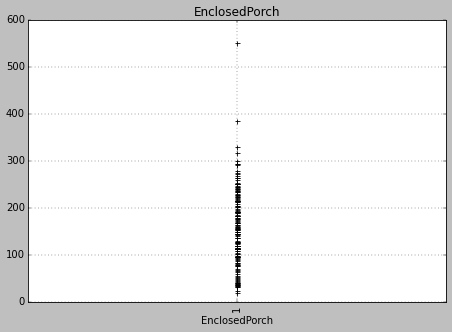

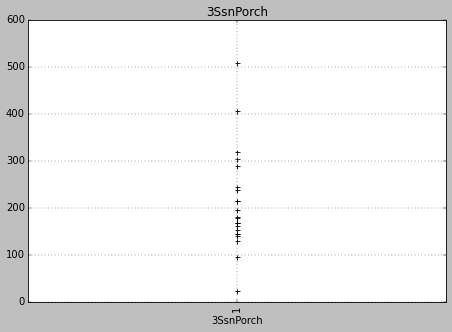

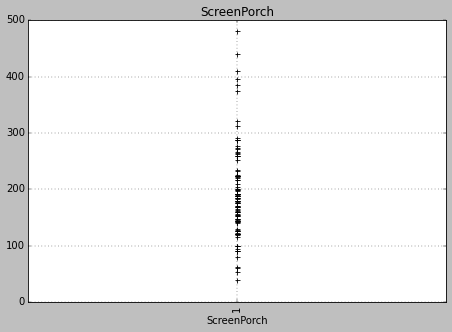

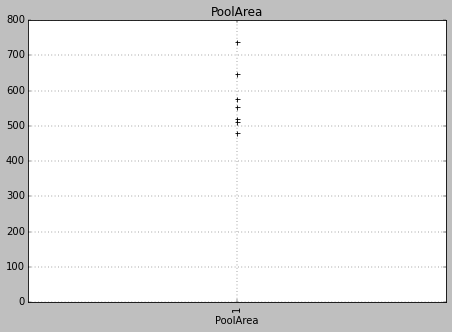

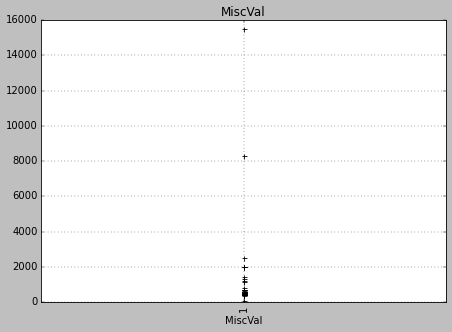

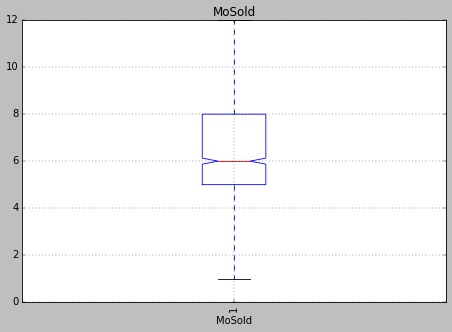

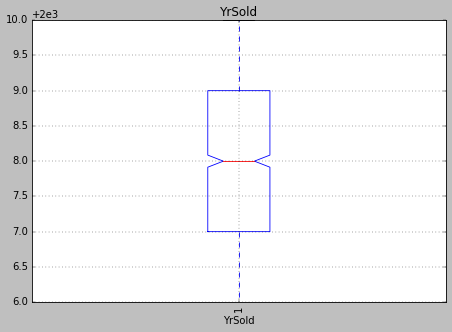

In [10]:
try:
    print("Box Plot Visualization")
    print("=="*50)
    plt.style.use('classic')
    fig = plt.figure(figsize=(30,70))
    if(os.path.isdir(path+"/plots/box_plot")):
        shutil.rmtree(path+"/plots/box_plot")
        os.mkdir(path+"/plots"+"/box_plot")
    else:
        os.mkdir(path+"/plots"+"/box_plot")
    for i in df.columns[df.dtypes != "object"]:
        if(i == "SalePrice"):
            continue
        plt.figure(dpi = 60)
        plt.boxplot(df[i],notch = True)
        plt.xlabel(i)
        plt.title(i)
        plt.xticks(rotation = 90)
        plt.grid(True)
        plt.tight_layout(pad = 2)
        plt.savefig(path + "/plots/box_plot/"+str(i)+".png")
    print("=="*50)
except Exception as e:
    print(e)

In [7]:
X = df.drop(["Id","SalePrice"], axis =1 )
y = df["SalePrice"]

In [8]:
try:
    print("=="*50)
    print("General look of dependent and independent features")
    print("=="*50)
    print("\nSample Observation\n")
    print("\nThe sample observations of Independent features are")
    print(X.head())
    print("\n\nThe sample observations of Dependent features are")
    print(y.head())
    print("\n"+"--"*50)
    print("\nShape of Independent and Independent variable")
    print("Shape of Independent feature is : ", X.shape)
    print("Shape of Dependent feature is : ",y.shape)
    print("\n"+"=="*50)
except Exception as e:
    print(e)
    

General look of dependent and independent features

Sample Observation


The sample observations of Independent features are
   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  60          RL       65.0         8450     Pave   Reg      Lvl          
1  20          RL       80.0         9600     Pave   Reg      Lvl          
2  60          RL       68.0         11250    Pave   IR1      Lvl          
3  70          RL       60.0         9550     Pave   IR1      Lvl          
4  60          RL       84.0         14260    Pave   IR1      Lvl          

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0  AllPub    Inside    Gtl       CollgCr      Norm       Norm       1Fam      
1  AllPub    FR2       Gtl       Veenker      Feedr      Norm       1Fam      
2  AllPub    Inside    Gtl       CollgCr      Norm       Norm       1Fam      
3  AllPub    Corner    Gtl       Crawfor      Norm       Norm       1Fam      
4  AllPub    FR2       

In [9]:
try:
    print("=="*50)
    print("Data is not very much normally distributed and has outliers hence we will apply Standardization to the dataset")
    print("Refer Normal distribution and box plots to observe and visualize the nature of dataset")
    print("=="*50)
    sc = StandardScaler()
    columns = X[X.columns[X.dtypes != "object"]].columns[X[X.columns[X.dtypes != "object"]].max() > 10]
    X[X[X.columns[X.dtypes != "object"]].columns[X[X.columns[X.dtypes != "object"]].max() > 10]] = sc.fit_transform(X[X[X.columns[X.dtypes != "object"]].columns[X[X.columns[X.dtypes != "object"]].max() > 10]])
    print("These are the features which gets transformed on the basis of Standardization")
    print(columns)
    print("=="*50)
except Exception as e:
    print(e)

Data is not very much normally distributed and has outliers hence we will apply Standardization to the dataset
Refer Normal distribution and box plots to observe and visualize the nature of dataset
These are the features which gets transformed on the basis of Standardization
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [10]:
X.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0  0.093701    RL      -0.254147    -0.218363  Pave   Reg      Lvl          
1 -0.876298    RL       0.422953    -0.107067  Pave   Reg      Lvl          
2  0.093701    RL      -0.118727     0.052620  Pave   IR1      Lvl          
3  0.336201    RL      -0.479847    -0.111906  Pave   IR1      Lvl          
4  0.093701    RL       0.603514     0.343926  Pave   IR1      Lvl          

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0  AllPub    Inside    Gtl       CollgCr      Norm       Norm       1Fam      
1  AllPub    FR2       Gtl       Veenker      Feedr      Norm       1Fam      
2  AllPub    Inside    Gtl       CollgCr      Norm       Norm       1Fam      
3  AllPub    Corner    Gtl       Crawfor      Norm       Norm       1Fam      
4  AllPub    FR2       Gtl       NoRidge      Norm       Norm       1Fam      

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0  2Story     7            5            1.014157   0.854216      Gable      
1  1Story     6            8            0.100528  -0.476562      Gable      
2  2Story     7            5            0.946480   0.804928      Gable      
3  2Story     7            5           -1.963596  -0.772291      Gable      
4  2Story     8            5            0.912642   0.706352      Gable      

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg  VinylSd     VinylSd     BrkFace    0.461582    Gd        TA         
1  CompShg  MetalSd     MetalSd     None      -0.594820    TA        TA         
2  CompShg  VinylSd     VinylSd     BrkFace    0.278328    Gd        TA         
3  CompShg  Wd Sdng     Wd Shng     None      -0.594820    TA        TA         
4  CompShg  VinylSd     VinylSd     BrkFace    1.291612    Gd        TA         

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0  PConc      Gd       TA       No           GLQ          0.527157     
1  CBlock     Gd       TA       Gd           ALQ          1.120240     
2  PConc      Gd       TA       Mn           GLQ          0.047458     
3  BrkTil     TA       Gd       No           ALQ         -0.541263     
4  PConc      Gd       TA       Av           GLQ          0.415954     

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0  Unf         -0.296255   -0.983421  -0.591875     GasA    Ex         
1  Unf         -0.296255   -0.678727   0.409598     GasA    Ex         
2  Unf         -0.296255   -0.337652  -0.434007     GasA    Ex         
3  Unf         -0.296255   -0.096626  -0.838543     GasA    Gd         
4  Unf         -0.296255   -0.210318   0.120996     GasA    Ex         

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0  Y          SBrkr     -0.828516  1.128813 -0.10374       0.331321    
1  Y          SBrkr      0.221935 -0.811389 -0.10374      -0.529579    
2  Y          SBrkr     -0.662928  1.156076 -0.10374       0.477367    
3  Y          SBrkr     -0.556848  0.906167 -0.10374       0.344773    
4  Y          SBrkr     -0.080781  1.580921 -0.10374       1.269088    

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0  1             0             2         1         3             1              
1  0             1             2         0         3             1              
2  1             0             2         1         3             1              
3  1             0             1         0         3             1              
4  1             0             2         1         4             1              

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0  Gd          0.915080      Typ        0           Gd          Attchd      
1  TA         -0.347165      Typ        1           TA          Attchd      
2  Gd         -0.347165      Typ        1           TA          Attchd      
3  Gd          0.2839

In [11]:
try:
    print("=="*50)
    print("Categorical variable are processed and the categorical values are converted into numbers")
    print("=="*50)
    if(os.path.isdir(path+"/encoder")):
        shutil.rmtree(path+"/encoder")
        os.mkdir(path+"/encoder")
    else:
        os.mkdir(path + "/encoder")
    for i in X.columns[X.dtypes == "object"]:
        encoder = LabelEncoder()
        X[i] = encoder.fit_transform(X[i])
        pickle.dump(encoder, open(path + "/encoder/"+str(i)+".pickle","wb"))
except Exception as e:
    print(e)

Categorical variable are processed and the categorical values are converted into numbers


In [12]:
try:
    print("=="*50)
    print("Multi-Collinearity Check")
    print("=="*50)
    print("These are the features who are correlated to each other")
    vif = []
    for i in range(len(X.columns)):
        vif.append(variance_inflation_factor(np.array(X),i))
    VIF = pd.DataFrame({"Features": X.columns , "Variance Inflation Factor":vif})
    print(VIF)
    print("=="*50)
    print("Removing Multi-Collinearity")
    print("=="*50)
    X["Derived_feature"] = X[VIF["Features"][VIF["Variance Inflation Factor"] > 5]].mean(axis = 1)
    X.drop(X[VIF["Features"][VIF["Variance Inflation Factor"] > 5]] , axis = 1, inplace = True)
    print("Features having high multi-collinearity is removed")
    print("=="*50)
    print("Processed Dataset details")
    print("\nThe Shape of Independent features are : ",X.shape)
    print("\n\nSamples of Independent features are ")
    print(X.head())
    print("=="*50)
    print("Adding these details in the metadata file")
    file = open(path+"/meta_data.txt","a")
    file.write("\nMulti-Collinearity details\n")
    file.write("=="*50)
    file.write(str(VIF))
    file.write("\n"+"=="*50)
    file.close()
    print("\nDetails added into metadata Successfull")
    print("=="*50)
    
except Exception as e:
    print(e)

Multi-Collinearity Check
These are the features who are correlated to each other


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         Features  Variance Inflation Factor
0   MSSubClass     5.696214                 
1   MSZoning       33.039562                
2   LotFrontage    1.769526                 
3   LotArea        1.683025                 
4   Street         257.853119               
5   LotShape       3.508401                 
6   LandContour    22.816027                
7   Utilities      1.109152                 
8   LotConfig      5.008327                 
9   LandSlope      1.754448                 
10  Neighborhood   6.651391                 
11  Condition1     7.074180                 
12  Condition2     59.168331                
13  BldgType       5.748950                 
14  HouseStyle     8.479278                 
15  OverallQual    82.773301                
16  OverallCond    55.002060                
17  YearBuilt      8.869527                 
18  YearRemodAdd   3.028675                 
19  RoofStyle      4.974962                 
20  RoofMatl       4.997105                 
21  Exteri

In [13]:
X.head()

LotFrontage   LotArea  LotShape  Utilities  LandSlope  YearRemodAdd  \
0 -0.254147    -0.218363  3         0          0          0.854216       
1  0.422953    -0.107067  3         0          0         -0.476562       
2 -0.118727     0.052620  0         0          0          0.804928       
3 -0.479847    -0.111906  0         0          0         -0.772291       
4  0.603514     0.343926  0         0          0          0.706352       

   RoofStyle  RoofMatl  MasVnrArea  Heating  HeatingQC  BsmtFullBath  \
0  1          1         0.461582    0        0          1              
1  1          1        -0.594820    0        0          0              
2  1          1         0.278328    0        0          1              
3  1          1        -0.594820    0        2          1              
4  1          1         1.291612    0        0          1              

   BsmtHalfBath  HalfBath  TotRmsAbvGrd  Fireplaces  GarageType  GarageYrBlt  \
0  0             1         0.915080      0           1           0.985427      
1  1             0        -0.347165      1           1          -0.104844      
2  0             1        -0.347165      1           1           0.904666      
3  0             0         0.283958      1           5           0.783525      
4  0             1         1.546203      1           1           0.864286      

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0  0.249341   -0.779554    0.202294    -0.349612      -0.118688  -0.283203      
1 -0.222023    1.557895   -0.731311    -0.349612      -0.118688  -0.283203      
2  0.570726   -0.779554   -0.088501    -0.349612      -0.118688  -0.283203      
3  0.752844   -0.779554   -0.195636     4.122511      -0.118688  -0.283203      
4  1.791989    0.726453    0.554309    -0.349612      -0.118688  -0.283203      

   PoolArea   MiscVal    MoSold    YrSold  Derived_feature  
0 -0.071771 -0.084535 -1.605319  0.146084  2.772156         
1 -0.071771 -0.084535 -0.493561 -0.605686  2.862900         
2 -0.071771 -0.084535  0.988784  0.146084  2.806096         
3 -0.071771 -0.084535 -1.605319 -1.357457  2.578516         
4 -0.071771 -0.084535  2.100542  0.146084  3.057494

In [ ]:
inertia = []
for i in range(11):
    c = KMeans(n_clusters= i)
    c.fit(X,)